In [14]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
import glob,os
warnings.filterwarnings('ignore')

In [54]:
# speed test
speedtest = pd.read_csv('/media/caozhichongchong/baf7fe39-6567-421c-a79a-4c274b89f9f7/scripts/snp_curate/SNP_model_parallel_new/alltimemapping.txt',
                    sep='\t',index_col = False)
speedtest['tool'] = [x.replace('mapper16mer','mapper 16mer').replace('mapper24mer','mapper 24mer').replace('mapper20mer','mapper 20mer').replace('minimap','minimap2').replace('bowtie','bowtie2 with seed mismatches') for x in speedtest['tool']]
speedtest.loc[(speedtest['tool']=='minimap2')&(speedtest['genome']=='all')&(speedtest['thread']==1),'time'] = 60*360 # did not finish after 1h
print(speedtest['tool'].unique())
speedtest.sort_values('time').head()


['minimap2' 'last' 'bowtie2 with seed mismatches' 'strobealign' 'bwa'
 'mapper' 'mapper 16mer' 'mapper 20mer' 'mapper 24mer']


,genome,tool,thread,time
44,all,strobealign,9,17.98
46,all,strobealign,15,18.55
47,all,strobealign,20,18.79
45,all,strobealign,11,18.81
48,all,strobealign,25,19.34


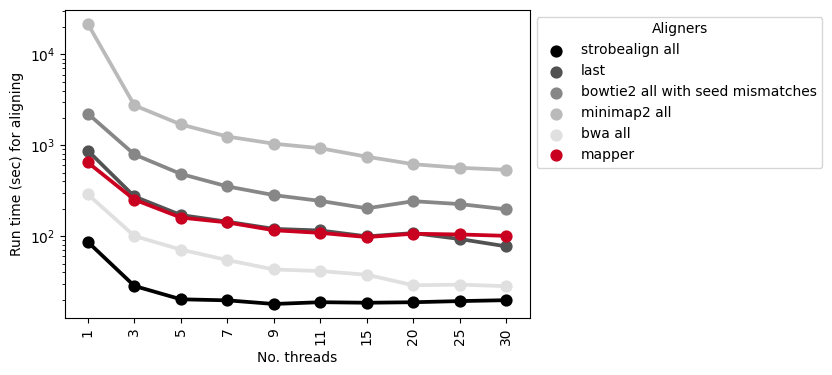

In [22]:
palette_set = {
    'bowtie2':'#878787','bowtie2 with seed mismatches':'#878787','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
    'last':'#525252',
    'mapper 12mer':'#c6dbef',
    'mapper 14mer':'#9ecae1',
    'mapper 16mer':'#6baed6',
     'mapper 18mer':'#4292c6',
    'mapper 20mer':'#2171b5',
    'mapper 22mer':'#08519c',
    'mapper 24mer':'#08306b',
     'mapper no gapped-xmer':'#f4a582',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
    }

legend_order = [ 'strobealign','last','bowtie2 with seed mismatches','minimap2','bwa','mapper',
              #  'mapper 16mer', 'mapper 20mer', 'mapper 24mer'
               ]

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6,4))
# sns.lineplot(data = speedtest[speedtest['genome']=='all'],
#             x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
sns.pointplot(data = speedtest[speedtest['genome']=='all'],
            x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('No. threads') 
axs.set_ylabel('Run time (sec) for aligning')
axs.set(yscale="log")
#axs.set_yticks([ 100, 1000,10000,60*360])
plt.sca(axs)
plt.xticks(rotation=90)

# Update the legend labels
handles, labels = axs.get_legend_handles_labels()
new_labels = ['minimap2 all' if label == 'minimap2' else 'bowtie2 all with seed mismatches' if label == 'bowtie2 with seed mismatches' else 'strobealign all' if label == 'strobealign' else 'bwa all' if label == 'bwa' else label for label in labels]
plt.legend(handles, new_labels, title='Aligners', bbox_to_anchor=(1.0, 1.0))

plt.savefig('all_genome_speed_test.pdf',bbox_inches='tight')


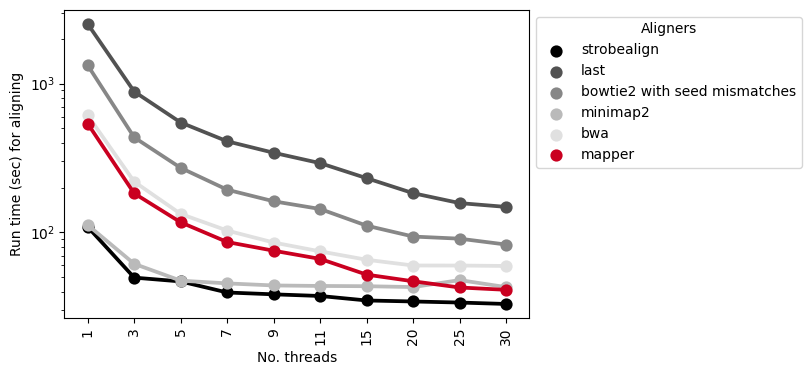

In [23]:

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6,4))
# sns.lineplot(data = speedtest[speedtest['genome']=='all'],
#             x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
sns.pointplot(data = speedtest[speedtest['genome']=='am0230'],
            x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('No. threads') 
axs.set_ylabel('Run time (sec) for aligning')
axs.set(yscale="log")
#axs.set_yticks([50, 100, 500,1000,1500])
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('am0230_genome_speed_test.pdf',bbox_inches='tight')


['minimap2' 'last' 'bowtie2' 'strobealign' 'bwa' 'mapper' 'mapper 16mer'
 'mapper 20mer' 'mapper 24mer']


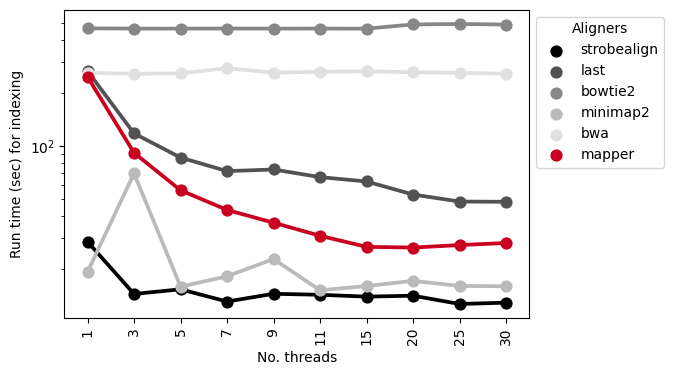

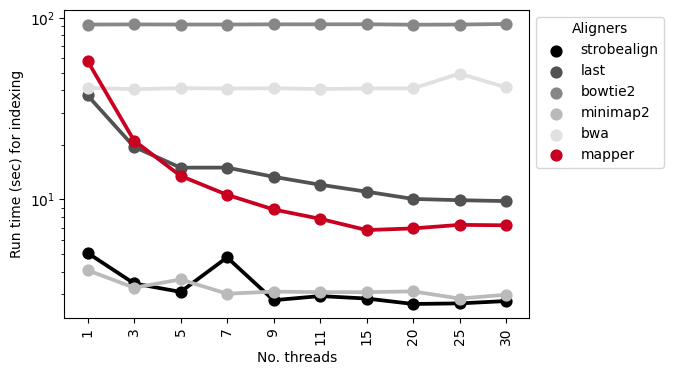

In [27]:
# speed test index
speedtest = pd.read_csv('/media/caozhichongchong/baf7fe39-6567-421c-a79a-4c274b89f9f7/scripts/snp_curate/SNP_model_parallel_new/alltimeindex.txt',
                    sep='\t',index_col = False)
speedtest['tool'] = [x.replace('mapper16mer','mapper 16mer').replace('mapper24mer','mapper 24mer').replace('mapper20mer','mapper 20mer').replace('minimap','minimap2').replace('bowtie','bowtie2') for x in speedtest['tool']]
speedtest.loc[speedtest['time']==0,'time'] = 60*360 # did not finish after 1h
print(speedtest['tool'].unique())

palette_set = {
    'bowtie2':'#878787','bowtie2 with seed mismatches':'#878787','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
    'last':'#525252',
    'mapper 12mer':'#c6dbef',
    'mapper 14mer':'#9ecae1',
    'mapper 16mer':'#6baed6',
     'mapper 18mer':'#4292c6',
    'mapper 20mer':'#2171b5',
    'mapper 22mer':'#08519c',
    'mapper 24mer':'#08306b',
     'mapper no gapped-xmer':'#f4a582',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
    }
legend_order = [ 'strobealign','last','bowtie2','minimap2','bwa','mapper',
               # 'mapper 16mer', 'mapper 20mer', 'mapper 24mer'
               ]

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6,4))
# sns.lineplot(data = speedtest[speedtest['genome']=='all'],
#             x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
sns.pointplot(data = speedtest[speedtest['genome']=='all'],
            x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('No. threads') 
axs.set_ylabel('Run time (sec) for indexing')
axs.set(yscale="log")
#axs.set_yticks([ 100, 1000,10000,60*360])
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('all_genome_speed_testindex.pdf',bbox_inches='tight')

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6,4))
# sns.lineplot(data = speedtest[speedtest['genome']=='all'],
#             x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
sns.pointplot(data = speedtest[speedtest['genome']=='am0230'],
            x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('No. threads') 
axs.set_ylabel('Run time (sec) for indexing')
axs.set(yscale="log")
#axs.set_yticks([50, 100, 500,1000,1500])
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('am0230_genome_speed_testindex.pdf',bbox_inches='tight')


In [92]:
# speed mapper memory
speedtest = pd.read_csv('/media/caozhichongchong/baf7fe39-6567-421c-a79a-4c274b89f9f7/scripts/snp_curate/SNP_model_parallel_new/allmappermemtime.txt',
                    sep='\t',index_col = False)
speedtest.loc[speedtest['time']==0,'time'] = 500# did not finish after 1h
# speedtest['memory'] = speedtest['memory']/np.power(10,6)
# speedtest['memory'] = [int(x) for x in speedtest['memory']]
speedtest.head()


,genome,tool,thread,memory_limit,time,memory
0,all,mappermem,5,5,500.00,5297492
1,all,mappermem,5,10,500.00,10452128
2,all,mappermem,5,15,236.39,16354768
3,all,mappermem,5,20,225.48,21915348
4,all,mappermem,5,30,220.11,32817632


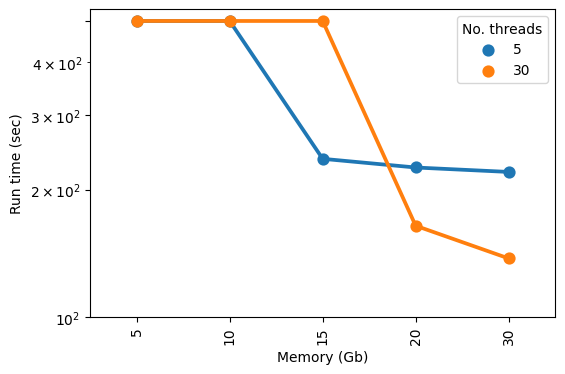

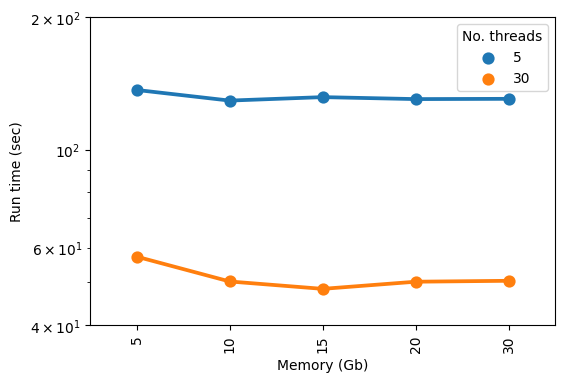

In [93]:

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6,4))
sns.pointplot(data = speedtest[speedtest['genome']=='all'],
            x='memory_limit',y='time',hue='thread')
axs.set_xlabel('Memory (Gb)') 
axs.set_ylabel('Run time (sec)')
axs.set(yscale="log")
axs.set_yticks([100, 200,300,500])
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'No. threads', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('all_genome_speed_memmapper.pdf',bbox_inches='tight')

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6,4))
# sns.lineplot(data = speedtest[speedtest['genome']=='all'],
#             x='thread',y='time',hue='tool',palette=palette_set,hue_order = legend_order)
sns.pointplot(data = speedtest[speedtest['genome']=='am0230'],
            x='memory_limit',y='time',hue='thread')
axs.set_xlabel('Memory (Gb)') 
axs.set_ylabel('Run time (sec)')
axs.set(yscale="log")
axs.set_yticks([40, 100,200])
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'No. threads', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('am0230_genome_speed_memmapper.pdf',bbox_inches='tight')


In [15]:
# accuracy VS speed
### penalty
max_penalty = {'bowtie':0.6,
              'bwa':0.5,
              'minimap':0.6,
              'mapper':1.0}
# palette_set = {
#     'bowtie2':'#878787','bowtie2 with seed mismatches':'#525252','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
#     'last':'#252525',
#     'mapper 12mer':'#c6dbef',
#     'mapper 14mer':'#9ecae1',
#     'mapper 16mer':'#6baed6',
#      'mapper 18mer':'#4292c6',
#     'mapper 20mer':'#2171b5',
#     'mapper 22mer':'#08519c',
#     'mapper 24mer':'#08306b',
#      'mapper no gapped-xmer':'#f4a582',
#         'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
#     }
palette_set = {
    'bowtie2':'#878787','minimap2':'#bababa','bwa':'#e0e0e0',
    'mapper':'#ca0020',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0',
    'strobealign':'#000000',
    'last':'#252525',
    'strobealign all':'#053061',
     'mapper no gapped-xmer':'#f4a582',
    'mapper 16mer':'#c2a5cf',
        'mapper 24mer':'#762a83',
         'mapper 20mer':'#9970ab',
        'No gapped k-mer unmatched':'#e66101',
    }

def compute_accuracy(samfile,tool,total_reads):
    score=pd.read_csv(samfile, sep='\t')
#     score = score.sort_values('readlen',ascending=False)
    score = score.drop_duplicates('readID') # remove short reads of the same ID, partial alignment by minimap and bwa
#     # all alignments
#     score['readlen'] = [len(x) for xin score['read']]
#     score['limit']=score['readlen']*max_penalty[tool]
#     score['minpenalty'] = [min(score.loc[x,'bowtie'],
#                                                   score.loc[x,'bwa'],
#                                                   score.loc[x,'minimap'],
#                                                   score.loc[x,'mapper']
#                                                  ) for x in score.index]
#     # removing those excending mapper penalty cutoff
#     score['fold']=score['minpenalty']/score['limit']
#     score = score[score['limit']>=score['minpenalty']]
    num_reads_no_diff = total_reads - score.shape[0]
    score_sum = {'tool':['bowtie2','bwa','minimap2','mapper',
                             'mapper 12mer','mapper 16mer',
                            'mapper 20mer','mapper 24mer','strobealign','bowtie2 with seed mismatches','last','mapper no gapped-xmer'],
                     'value':[0,0,0,0,0,0,0,0,0,0,0,0]}
    #score['minpenaltyall']=score.iloc[:,3:].min(axis=1)
    score_sum['value'][0]=score[score['bowtie']<=score['minpenalty']].shape[0]
    score_sum['value'][1]=score[score['bwa']<=score['minpenalty']].shape[0]
    score_sum['value'][2]=score[score['minimap']<=score['minpenalty']].shape[0]
    score_sum['value'][3]=score[score['mapper']<=score['minpenalty']].shape[0]
    score_sum['value'][4]=score[score['mapper.kmer12']<=score['minpenalty']].shape[0]
    score_sum['value'][5]=score[score['mapper.kmer16']<=score['minpenalty']].shape[0]
    score_sum['value'][6]=score[score['mapper.kmer20']<=score['minpenalty']].shape[0]
    score_sum['value'][7]=score[score['mapper.kmer24']<=score['minpenalty']].shape[0]
    score_sum['value'][8]=score[score['strobealign']<=score['minpenalty']].shape[0]
    score_sum['value'][9]=score[score['bowtieN1']<=score['minpenalty']].shape[0]
    score_sum['value'][10]=score[score['last']<=score['minpenalty']].shape[0]
    score_sum['value'][11]=score[score['mapper.nogapped']<=score['minpenalty']].shape[0]
    score_sum=pd.DataFrame(score_sum)
    score_sum['value']=score_sum['value']
    score_sum['accuracy']=(score_sum['value'] + num_reads_no_diff)/total_reads*100
    print(tool,'reads no diff =',num_reads_no_diff/total_reads,num_reads_no_diff,'reads with diff=',score.shape[0]/total_reads,score.shape[0])
    return [score_sum,num_reads_no_diff/total_reads*100]
folder = 'SNP_model_penalty/'

total_reads = 19002904/4
allsam = glob.glob('%s/bowtie/am0230*.samcompare.withtag.txt'%(folder))
allsam.sort()
print(allsam)
allscore = pd.DataFrame()
for samfile in allsam:
    tool = os.path.split(samfile)[-1].split('.samcompare.withtag.txt')[0].split('.')[-1]
    score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
    score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    allscore = allscore.append(score_sum)

allscore.head()

['SNP_model_penalty//bowtie/am0230_all.fastq_am0230.fasta.bowtie.samcompare.withtag.txt']
bowtie reads no diff = 0.7200000589383602 3420523.0 reads with diff= 0.27999994106163983 1330203


,tool,value,accuracy,penalty
0,bowtie2,1304564,99.460314,bowtie2
1,bwa,1318024,99.743639,bowtie2
2,minimap2,1309161,99.557078,bowtie2
3,mapper,1327889,99.951292,bowtie2
4,mapper 12mer,1289413,99.141394,bowtie2


In [16]:
allscore['tool'].unique()

array(['bowtie2', 'bwa', 'minimap2', 'mapper', 'mapper 12mer',
       'mapper 16mer', 'mapper 20mer', 'mapper 24mer', 'strobealign',
       'bowtie2 with seed mismatches', 'last', 'mapper no gapped-xmer'],
      dtype=object)

In [17]:
# speed test
speedtest = pd.read_csv('/media/caozhichongchong/baf7fe39-6567-421c-a79a-4c274b89f9f7/scripts/snp_curate/SNP_model_parallel_new/alltimemapping.txt',
                    sep='\t',index_col = False)
speedtest['tool'] = [x.replace('mapper16mer','mapper 16mer').replace('mapper24mer','mapper 24mer').replace('mapper20mer','mapper 20mer').replace('minimap','minimap2').replace('bowtie','bowtie2 with seed mismatches') for x in speedtest['tool']]
speedtest.loc[(speedtest['tool']=='minimap2')&(speedtest['genome']=='all')&(speedtest['thread']==1),'time'] = 60*360 # did not finish after 1h
print(speedtest['tool'].unique())
speedtest.sort_values('time').head()


['minimap2' 'last' 'bowtie2 with seed mismatches' 'strobealign' 'bwa'
 'mapper' 'mapper 16mer' 'mapper 20mer' 'mapper 24mer']


,genome,tool,thread,time
44,all,strobealign,9,17.98
46,all,strobealign,15,18.55
47,all,strobealign,20,18.79
45,all,strobealign,11,18.81
48,all,strobealign,25,19.34


In [18]:
speedtestsub = speedtest[speedtest['genome']=='am0230'][speedtest['thread']==30]
allscoresub = allscore.merge(speedtestsub,left_on = 'tool',right_on = 'tool',how = 'inner')
allscoresub['sub'] = 100- allscoresub['accuracy']
allscoresub

,tool,value,accuracy,penalty,genome,thread,time,sub
0,bwa,1318024,99.743639,bowtie2,am0230,30,59.550,0.256361
1,minimap2,1309161,99.557078,bowtie2,am0230,30,42.930,0.442922
2,mapper,1327889,99.951292,bowtie2,am0230,30,41.173,0.048708
3,mapper 16mer,1321958,99.826448,bowtie2,am0230,30,44.690,0.173552
4,mapper 20mer,1311581,99.608018,bowtie2,am0230,30,39.785,0.391982
5,mapper 24mer,1295891,99.277752,bowtie2,am0230,30,43.411,0.722248
6,strobealign,1252885,98.372501,bowtie2,am0230,30,33.080,1.627499
7,bowtie2 with seed mismatches,1314975,99.679460,bowtie2,am0230,30,82.920,0.320540
8,last,1316353,99.708466,bowtie2,am0230,30,148.460,0.291534


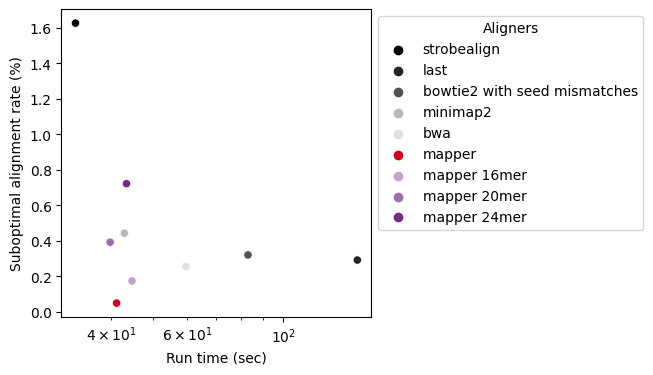

In [19]:
# palette_set = {
#     'bowtie2':'#878787','bowtie2 with seed mismatches':'#525252','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
#     'last':'#252525',
#     'mapper 12mer':'#c6dbef',
#     'mapper 14mer':'#9ecae1',
#     'mapper 16mer':'#6baed6',
#      'mapper 18mer':'#4292c6',
#     'mapper 20mer':'#2171b5',
#     'mapper 22mer':'#08519c',
#     'mapper 24mer':'#08306b',
#      'mapper no gapped-xmer':'#f4a582',
#         'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
#     }
palette_set = {
    'bowtie2':'#878787','minimap2':'#bababa','bwa':'#e0e0e0',
    'mapper':'#ca0020','bowtie2 with seed mismatches':'#525252',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0',
    'strobealign':'#000000',
    'last':'#252525',
    'strobealign all':'#053061',
     'mapper no gapped-xmer':'#f4a582',
    'mapper 16mer':'#c2a5cf',
        'mapper 24mer':'#762a83',
         'mapper 20mer':'#9970ab',
        'No gapped k-mer unmatched':'#e66101',
    }

legend_order = [ 'strobealign','last','bowtie2 with seed mismatches','minimap2','bwa','mapper',
              'mapper 16mer', 'mapper 20mer', 'mapper 24mer'
               ]

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(4,4))
sns.scatterplot(data = allscoresub,
            x='time',y='sub',hue='tool',palette=palette_set,hue_order = legend_order)
axs.set_ylabel('Suboptimal alignment rate (%)') 
axs.set_xlabel('Run time (sec)')
axs.set(xscale="log")
# plt.sca(axs)
# plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('am0230_genome_speed_accuracy.pdf',bbox_inches='tight')


In [20]:
# consistency
allresultset=pd.read_csv('SNP_model_multi/comparesumshort.txt',sep='\t')
allresultset = allresultset[allresultset['penalty']=='bowtie']
allresultset

,alignment_allworse_single_miss_reads,alignment_allworse_all_suboptimal_reads,penalty,tool,total_reads
0,0.003079,7.347603e-01,bowtie,bowtie2 all,3209652
1,0.519650,1.561310e-04,bowtie,minimap2 all,3215249
2,0.518471,2.636073e-04,bowtie,bwa all,3224494
3,0.520867,5.608487e-06,bowtie,bowtie2,3209422
4,0.519728,1.564420e-04,bowtie,minimap2,3215249
5,0.520111,7.691196e-05,bowtie,bwa,3224466
24,0.000915,1.246667e-06,bowtie,mapper,3208556
25,0.032582,3.117725e-07,bowtie,mapper 16mer,3207467
26,0.032452,3.120336e-07,bowtie,mapper 20mer,3204783
27,0.032810,3.127076e-07,bowtie,mapper 24mer,3197876


In [21]:
speedtestsub = speedtest[speedtest['genome']=='all'][speedtest['thread']==30]
speedtestsub['tool'] = [x.replace('bowtie2 with seed mismatches','bowtie2 all with seed mismatches').replace('bwa','bwa all').replace('minimap2','minimap2 all').replace('strobealign','strobealign all') for x in speedtestsub['tool']]
allresultset['tool'] = [x.replace('bowtie2 all','bowtie2 all with seed mismatches') for x in allresultset['tool']]

allresultsetsub = allresultset.merge(speedtestsub,left_on = 'tool',right_on = 'tool',how = 'inner')
allresultsetsub


,alignment_allworse_single_miss_reads,alignment_allworse_all_suboptimal_reads,penalty,tool,total_reads,genome,thread,time
0,0.003079,7.347603e-01,bowtie,bowtie2 all with seed mismatches,3209652,all,30,197.540
1,0.519650,1.561310e-04,bowtie,minimap2 all,3215249,all,30,537.100
2,0.518471,2.636073e-04,bowtie,bwa all,3224494,all,30,28.210
3,0.000915,1.246667e-06,bowtie,mapper,3208556,all,30,100.985
4,0.032582,3.117725e-07,bowtie,mapper 16mer,3207467,all,30,83.623
5,0.032452,3.120336e-07,bowtie,mapper 20mer,3204783,all,30,86.508
6,0.032810,3.127076e-07,bowtie,mapper 24mer,3197876,all,30,87.719
7,0.024076,5.341360e-01,bowtie,strobealign all,3210658,all,30,19.790
8,0.034084,6.487207e-02,bowtie,last,3211829,all,30,77.270


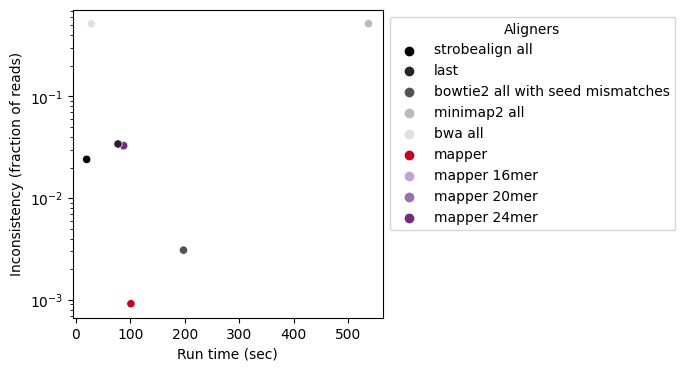

In [22]:
# palette_set = {
#     'bowtie2 all':'#878787',
#     'bowtie2 all with seed mismatches':'#525252',
#     'minimap2 all':'#bababa','bwa all':'#e0e0e0','mapper':'#ca0020','strobealign all':'#000000',
#     'last':'#252525',
#     'mapper 12mer':'#c6dbef',
#     'mapper 14mer':'#9ecae1',
#     'mapper 16mer':'#6baed6',
#      'mapper 18mer':'#4292c6',
#     'mapper 20mer':'#2171b5',
#     'mapper 22mer':'#08519c',
#     'mapper 24mer':'#08306b',
#      'mapper no gapped-xmer':'#f4a582',
#     }
palette_set = {
    'bowtie2 all':'#878787',
    'bowtie2 all with seed mismatches':'#525252',
    'minimap2 all':'#bababa','bwa all':'#e0e0e0','mapper':'#ca0020','strobealign all':'#000000',
    'last':'#252525',
     'mapper no gapped-xmer':'#f4a582',
    'mapper 16mer':'#c2a5cf',
        'mapper 24mer':'#762a83',
         'mapper 20mer':'#9970ab',
        'No gapped k-mer unmatched':'#e66101',
    }
legend_order = [ 'strobealign all','last','bowtie2 all with seed mismatches','minimap2 all','bwa all','mapper',
              'mapper 16mer', 'mapper 20mer', 'mapper 24mer'
               ]

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(4,4))
sns.scatterplot(data = allresultsetsub,
            x='time',y='alignment_allworse_single_miss_reads',hue='tool',palette=palette_set,hue_order = legend_order)
axs.set_ylabel('Inconsistency (fraction of reads)') 
axs.set_xlabel('Run time (sec)')
axs.set(yscale="log")
# plt.sca(axs)
# plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('all_genome_speed_inconsistency.pdf',bbox_inches='tight')


In [ ]:
###

In [1]:
%reset -f


In [4]:
# # process last sams
# import numpy as np
# from numpy.random import randn
# import matplotlib.pyplot as plt
# import pandas as pd
# from pandas import Series, DataFrame,date_range
# from matplotlib import cm
# import seaborn as sns
# import scipy as sp
# import math
# import warnings
# import glob,os
# allsam = glob.glob('SNP_model_penalty/*/DRR163384*last.sam')
# print(allsam)
# for samfile in allsam[1:]:
#     newoutput = []
#     bestalign = {}
#     print(samfile)
#     for lines in open(samfile,'r'):
#         if not lines.startswith('@'):
#             lines_set = lines.split('\t')
#             readID = lines_set[0] + '\t' + lines_set[9]
#             AS = float(lines_set[12].split(':')[-1])
#             bestalign.setdefault(readID,[0,''])
#             oldAS,oldline = bestalign[readID]
#             if AS > oldAS:
#                 bestalign[readID] = [AS,lines]
#     for readID in bestalign:
#         newoutput.append(bestalign[readID][-1])
#     bestalign = ''
#     f1 = open(samfile + '.filtered','w')
#     f1.write(''.join(newoutput))
#     f1.close()

['SNP_model_penalty/bwa/DRR163384_all.fastq_DRR163384.fasta.last.sam', 'SNP_model_penalty/bowtie/DRR163384_all.fastq_DRR163384.fasta.last.sam', 'SNP_model_penalty/mapper/DRR163384_all.fastq_DRR163384.fasta.last.sam', 'SNP_model_penalty/minimap/DRR163384_all.fastq_DRR163384.fasta.last.sam']


In [5]:
# %reset -f

In [67]:
# load sams

import glob
import os
from Bio import SeqIO
from Bio.Seq import Seq
import argparse
import re
from multiprocessing import Process
from multiprocessing import Queue
from itertools import islice
from datetime import datetime
import psutil
import hashlib

import gc
gc.collect()

score = ''
samplenameset = ['DRR163384','am0230']# 'am_PaDi_g0001'#'Bactor'#'am0230'
toolset = {
    'mapper1':0,
        'bwa':1,
    'bowtie':2,
    'minimap':3,
        'last':4,
        'mapper1.kmer16':5,
    'mapper1.nogapped':6,
    'strobealign':7,
    # 'bowtie':8,
}
penalty_set = ['bowtie','mapper','bwa','minimap']
max_penalty_set = {
    
    'mapper':0.1,
    'bowtie':0.6,
    'bwa':0.5,
    'minimap':0.6,
}

soft_clip_middle_penalty = 500
max_score = 1000
penalty_setscore = {
    'bowtie':[6,5,3,0,1],
    'minimap':[6,4,2,0,1],
    'bwa':[5,6,1,0,1],
    'mapper':[1,2,0.5,0,0.1]
}


def ref_read_chopbyCIGAR(readID, read,ref, CIGAR, CHRPOS,treat_soft_clip_as_N):
    # read,ref, CIGAR, CHRPOS,treat_soft_clip_as_N
    if CIGAR == '*':
        return max_score
    CIGARlenset = re.split('S|D|M|I|N|H|P|X|=', CIGAR)[:-1]
    i = 0
    kread = 0
    kref = 0
    readset = []
    refset = []
    penalty = 0
    #print('start',read,ref,CIGAR,CIGARlenset)
    CIGARlocus = 0
    for CIGARlen in CIGARlenset:
        i += len(CIGARlen)
        CIGARtype = CIGAR[i]
        #print('process CIGAR',CIGARtype,CIGARlen)
        i += 1
        if CIGARtype in (['M','X','=']):
            # matches
            readset += read[kread:(kread + int(CIGARlen))]
            refset += ref[kref:(kref + int(CIGARlen))]
            kread += int(CIGARlen)
            kref += int(CIGARlen)
            # print('M',penalty,kread,kref,''.join(readset),''.join(refset))
        elif CIGARtype == 'S' or CIGARtype == 'H':
            # clipping in read treat as ambiguous matches
            if treat_soft_clip_as_N:
                kread += int(CIGARlen)
                penalty += int(CIGARlen) * n_penalty
                # print('S', penalty,kread, kref)
            else:
                # insertion in read, no longer treated as ambiguous matches (because other tools do not)
                # what if the ref has all Ns at soft clipping regions?
                kread += int(CIGARlen)
                penalty += gapopen_penalty + int(CIGARlen) * gapextend_penalty + soft_clip_middle_penalty # + int(CIGARlen)*n_penalty
                if tool in ['minimap','bwa']:
                    read_with_softclips_in_middle_read.add(readID)
                # print('S->I', penalty, kread, kref)
        elif CIGARtype == 'I':
            # insertion in read, no longer treated as ambiguous matches (because other tools do not), because we can't verify that they match what was in the reference (because the reference had nothing there)
            kread += int(CIGARlen)
            penalty += gapopen_penalty + int(CIGARlen) * gapextend_penalty  # + int(CIGARlen)*n_penalty
            # print('I', penalty,kread, kref)
        elif CIGARtype == 'D':
            # insertion in ref
            kref += int(CIGARlen)
            penalty += gapopen_penalty + int(CIGARlen) * gapextend_penalty
            #print('D', penalty,kread, kref)
        elif CIGARtype == 'N':
            # skipped region from the reference
            kref += int(CIGARlen)
            penalty += int(CIGARlen)*n_penalty
            #print('N', penalty,kread, kref)
        elif CIGARtype == 'P':
            # hard clipping or padding
            pass
        CIGARlocus += 1
    return mismatch_check(readset,refset,penalty)

def load_ref(database):
    Ref = dict()
    for record in SeqIO.parse(database, 'fasta'):
        Ref.setdefault(str(record.id),str(record.seq))
    return Ref

def is_read_reverse_strand(flag):
    return bool(flag & 16)
def is_supplementary_alignment(flag):
    return bool(flag & 2048)

def mismatch_check(readset,refset,penalty):
    totallen = min(len(readset),len(refset))
    mismatch = 0
    nDNA = 0
    for i in range(0,totallen):
        if refset[i] == 'N' or readset[i]=='N':
            nDNA += 1
        elif readset[i] != refset[i]:
            mismatch += 1
    #print('total pennlty=',penalty+mismatch*mismatch_penalty + nDNA*n_penalty,'mismatch = ',mismatch,'nDNA=',nDNA)
    #print(penalty,mismatch,nDNA)
    final_penalty = (penalty + mismatch*mismatch_penalty + nDNA*n_penalty + (totallen-mismatch-nDNA)*match_penalty)
    #print('final penalty=',final_penalty,totallen,(totallen-mismatch-nDNA)*match_penalty)
    return final_penalty

def add_tag_tool(toolscore,toolCHRPOS,bestCHRPOS,bestscore):
    if bestscore == toolscore:
        return 'bestalignment'
    if max_score == toolscore:
        return 'alignmentmissed'
    toolCHR, toolPOS = toolCHRPOS.split('\t')
    try:
        bestCHR, bestPOS = bestCHRPOS.split('\t')
    except ValueError:
        print(toolscore,toolCHRPOS,bestCHRPOS,bestscore)
        return 'badalignment' # caused by S
    if toolCHR != bestCHR:
        return 'diffCHR'
    else:
        bestPOS = int(bestPOS)
        toolPOS = int(toolPOS)
        if bestPOS == toolPOS:
            return 'sameCHRsamePOS'
        elif toolPOS <= bestPOS + 100 and toolPOS >= bestPOS - 100:
            return 'sameCHRclosePOS'
        else:
            return 'sameCHRdiffPOS'

def add_tag(newscore,allCIGAR,allCHRPOS):
    tag2 = ''
    bestscore = min(newscore)
    besttool = newscore.index(bestscore)
    bestCIGAR = allCIGAR[besttool]
    bestCHRPOS = allCHRPOS[besttool]
    worstscore = max(newscore)
    worsttool = newscore.index(worstscore)
    worstCIGAR = allCIGAR[worsttool]
    if 'S' or 'H' in bestCIGAR:
        tag2 += 'RightSoft'
    if 'I' in bestCIGAR or 'D' in bestCIGAR:
        tag2 += 'RightIn'
    if 'S' or 'H' in worstCIGAR:
        tag2 += 'WrongSoft'
    if 'I' in worstCIGAR or 'D' in worstCIGAR:
        tag2 += 'WrongIn'
    if tag2 == '' and 'H' not in worstCIGAR and 'H' not in bestCIGAR and bestscore >= mismatch_penalty*5:
        tag2 += '>=5 SNPs'
    tagtool = []
    for i in range(0,len(newscore)):
        tagtool.append(add_tag_tool(newscore[i],allCHRPOS[i],bestCHRPOS,bestscore))
    return [tagtool,tag2,bestscore]

for samplename in samplenameset[:1]:
    if 'DRR' not in samplename:
        toolset = {
    'mapper1':0,
    'bowtie':1,
    'bwa':2,
    'minimap':3,
        'mapper1.kmer12':4,
        'mapper1.kmer16':5,
    'mapper1.kmer20':6,
     'mapper1.kmer24':7,
    'strobealign':8,
    'bowtieN1':9,
    'last':10,
    'mapper1.nogapped':11,
}
    allref = glob.glob('test_data/penalty_test/%s*.fasta' % (samplename[:3]))[0]
    print(allref)
    Ref = load_ref(allref)
    for penaltyname in penalty_set[1:]:
#         if penaltyname == 'mapper' and samplename == 'am0230':
#             pass
#         else:
            penaltylist = dict()
            read_with_softclips_in_middle_read = set()
            allread = dict()
            max_penalty = max_penalty_set[penaltyname]
            mismatch_penalty, gapopen_penalty, gapextend_penalty, match_penalty, n_penalty = penalty_setscore[penaltyname]
            print(penaltyname, mismatch_penalty, gapopen_penalty, gapextend_penalty, match_penalty, n_penalty,max_penalty)
            for tool in toolset:
                sam = 'SNP_model_penalty/%s/%s_all.fastq_%s.fasta.%s.sam'%(penaltyname,samplename,samplename,tool)
                if tool == 'last' and 'DRR' in samplename:
                    sam += '.filtered'
                print(sam)
                position = toolset[tool]
                for lines in open(sam,'r'):
                    if not lines.startswith('@'):
                            lines_set = lines.split('\n')[0].split('\t')
                            CHR, POS = lines_set[2:4]
                            FLAG = int(lines_set[1])
                            read = lines_set[9].upper()
                            read_reverse = str(Seq(read).reverse_complement())
                            readname = lines_set[0]
                            allread.setdefault(readname,set())
                            complete_seq = True
                            if is_read_reverse_strand(FLAG):
                                readID = readname +'\t'+ read_reverse
                                if tool in ['bowtieN1','mapper','bwa','minimap','strobealign']:
                                    allread[readname].add(read_reverse)
                                elif tool == 'last':
                                    # last sometimes output incomplete query sequence
                                    for savedseq in allread[readname]:
                                        if len(read_reverse) < len(savedseq) and read_reverse in savedseq:
                                            readID = readname +'\t'+ savedseq
                                            complete_seq = False
                                            break
                            else:
                                readID = readname + '\t' + read
                                if tool in ['bowtieN1','mapper','bwa','minimap','strobealign']:
                                    allread[readname].add(read)
                                elif tool == 'last':
                                    # last sometimes output incomplete query sequence
                                    for savedseq in allread[readname]:
                                        if len(read) < len(savedseq) and read in savedseq:
                                            readID = readname +'\t'+ savedseq
                                            complete_seq = False
                                            break
                            CHR = CHR.split(' ')[0]
                            penaltylist.setdefault(readID,[
                                                   [max_score]*len(toolset),
                                ['']*len(toolset),['']*len(toolset),len(read)
                            ]
                                                  )
                            if CHR != '*' and not is_supplementary_alignment(FLAG):
                                CHRPOS = '%s\t%s'%(CHR,POS)
                                # read matches somewhere
                                CIGAR = lines_set[5]
                                reflen = len(Ref[CHR])
                                readlen = len(read)
                                POS = int(POS)
                                POSend = POS + readlen
                                treat_soft_clip_as_N = False
                                if POS <= 1 or POSend >= reflen:
                                    # possible soft clip when it's the end of the read
                                    treat_soft_clip_as_N = True
                                ref = Ref[CHR][(POS - 1):min(POSend, reflen)]
                                if tool == 'last' and not complete_seq:
                                    # fix incomplete query and ref sequence reported by last
                                    completeread = readID.split('\t')[1]
                                    if read in completeread:
                                        ref = completeread.split(read)[0] + ref + completeread.split(read)[1]
                                        read = completeread
                                    else:
                                        completeread = str(Seq(completeread).reverse_complement())
                                        if read in completeread:
                                            ref = completeread.split(read)[0] + ref + completeread.split(read)[1]
                                            read = completeread
                                penalty = ref_read_chopbyCIGAR(readID,read,ref, CIGAR, CHRPOS,treat_soft_clip_as_N)
                                previous_penalty = penaltylist[readID][0][position]
                                if previous_penalty > penalty:
                                    penaltylist[readID][0][position] = penalty
                                    penaltylist[readID][1][position] = CIGAR
                                    penaltylist[readID][2][position] = CHRPOS
                                # if lines_set[0] == '7001174F:HVTFNBCXX161011:HVTFNBCXX:2:2116:1362:25642':
                                #     print(treat_soft_clip_as_N,lines_set[0])
                                #     print(readID)
                                #     print(read)
                                #     print(ref)
                                #     print(CIGAR)
                                #     print(penalty,previous_penalty)
                                #     break
        #     print(len(penaltylist))
        #     print(penaltylist[readID])
            print('start process all final results')
            newresult = ['readID\tread\t%s\t%s\ttag2\tminpenalty\n'%('\t'.join(
            [x.replace('mapper1','mapper') for x in toolset]),'\t'.join(
            ['tag'+ x.replace('mapper1','mapper') for x in toolset])
            )]
            f1 = open('SNP_model_penalty/%s/%s_all.fastq_%s.fasta.%s.samcompare.withtag.txt'%(penaltyname,samplename,samplename,penaltyname),'w')
            i = 0
            for readID in penaltylist:
                newscore,allCIGAR,allCHRPOS,readlen = penaltylist[readID]
                tagtool, tagtotal,bestscore = add_tag(newscore,allCIGAR,allCHRPOS)
                limitpenalty = readlen * max_penalty
                if min(newscore[0:4]) <= limitpenalty:
                    newresult.append('%s\t%s\t%s\t%s\t%s\n'%(
                    readID,'\t'.join([str(x) for x in newscore]),'\t'.join(tagtool),tagtotal,bestscore
                    ))
                    i += 1
                    if i%10000 == 0:
                        f1.write(''.join(newresult))
                        print('output %s lines'%(i))
                        newresult = []
            f1.write(''.join(newresult))
            f1.close()
            print('start process clean final results')
            newresult = ['readID\tread\t%s\t%s\ttag2\tminpenalty\n'%('\t'.join(
                [x.replace('mapper1','mapper') for x in toolset]),'\t'.join(
                ['tag'+ x.replace('mapper1','mapper') for x in toolset])
                )]
            f1 = open('SNP_model_penalty/%s/%s_all.fastq_%s.fasta.%s.samcompare.withtagclean.txt'%(penaltyname,samplename,samplename,penaltyname),'w')
            i = 0
            for readID in penaltylist:
                newscore,allCIGAR,allCHRPOS,readlen = penaltylist[readID]
                tagtool, tagtotal,bestscore = add_tag(newscore,allCIGAR,allCHRPOS)
                limitpenalty = readlen * max_penalty
                if min(newscore[0:4]) <= limitpenalty:
                    if readID not in read_with_softclips_in_middle_read:
                        newresult.append('%s\t%s\t%s\t%s\t%s\n'%(
                    readID,'\t'.join([str(x) for x in newscore]),'\t'.join(tagtool),tagtotal,bestscore
                    ))
                        i += 1
                        if i%1000000 == 0:
                            f1.write(''.join(newresult))
                            print('output %s lines'%(i))
                            newresult = []      
            f1.write(''.join(newresult))
            f1.close()


In [4]:
%reset -f

In [ ]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
import glob,os
warnings.filterwarnings('ignore')
import gc
gc.collect()
samplename = 'DRR163384'# 'am_PaDi_g0001'#'Bactor'#'am0230'

score = pd.read_csv('SNP_model_penalty/bwa/%s_all.fastq_%s.fasta.bwa.samcompare.withtagclean.txt'%(samplename,samplename),
                    sep='\t')
print(score.shape,
    score[score['mapper']>score['minpenalty']].shape,
     score[score['bowtie']>score['minpenalty']].shape,
      score[score['bwa']>score['minpenalty']].shape,
     score[score['minimap']>score['minpenalty']].shape,
    score[score['strobealign']>score['minpenalty']].shape,
      score[score['last']>score['minpenalty']].shape,
      score[score['mapper.nogapped']>score['minpenalty']].shape,
      # score[score['mapper.kmer14']>score['minpenalty']].shape,
      score[score['mapper.kmer16']>score['minpenalty']].shape,
     )
#(8978641, 14) (37236, 14) (320582, 14) (391775, 14) (197040, 14) (979746, 14) mapper 106
#(8978654, 14) (34379, 14) (320604, 14) (391768, 14) (197114, 14) (979727, 14)
# (8976657, 16) (80287, 16) (368905, 16) (438702, 16) (244907, 16) (1023887, 16) (500559, 16) # mapper 115 + last
#(9018819, 16) mapper (37934, 16) bowtie N1 (309153, 16) bwa (402045, 16) nogap (100896, 16) kmer 14 (2252311, 16) kmer 16 (277769, 16)


In [3]:
score = pd.read_csv('SNP_model_penalty//bowtie/am0230_all.fastq_am0230.fasta.bowtie.samcompare.withtagclean.txt',
                    sep='\t')
print(score.shape,
    score[score['mapper']>score['minpenalty']].shape,
     score[score['bowtie']>score['minpenalty']].shape,
      score[score['bwa']>score['minpenalty']].shape,
     score[score['minimap']>score['minpenalty']].shape,
    score[score['strobealign']>score['minpenalty']].shape,
      score[score['last']>score['minpenalty']].shape,
      score[score['mapper.nogapped']>score['minpenalty']].shape,
      score[score['mapper.kmer12']>score['minpenalty']].shape,
      score[score['mapper.kmer16']>score['minpenalty']].shape,
       score[score['mapper.kmer20']>score['minpenalty']].shape,
      score[score['mapper.kmer24']>score['minpenalty']].shape,
     )
# (2593106, 30) (3373, 30) (34169, 30) (14508, 30) (29200, 30) (118345, 30) mapper 106
# (2593106, 30) (3375, 30) (34169, 30) (14508, 30) (29200, 30) (118345, 30) mapper 107
# (2593179, 30) (3403, 30) (34242, 30) (14581, 30) (29273, 30) (118418, 30) mapper 108
# (2083901, 32) (1415, 32) (16876, 32) (3677, 32) (17929, 32) (69419, 32) (5273, 32) with last
# (2593197, 32) (3448, 32) (34278, 32) (14612, 32) (29309, 32) (118447, 32) (76367, 32) soft clip only for bwa and minimap
# (2593197, 32) (3429, 32) (34260, 32) (14598, 32) (29290, 32) (118436, 32) (18926, 32) mapper 108, last -T1
# (2592456, 32) (11889, 32) (33519, 32) (13857, 32) (28549, 32) (117695, 32) (18785, 32) mapper 109, last -T1 -k10
# (2592141, 32) (7744, 32) (33204, 32) (13542, 32) (28234, 32) (117380, 32) (18785, 32) mapper 110
# (2592434, 32) (5829, 32) (33497, 32) (13836, 32) (28528, 32) (117673, 32) (18828, 32) mapper 111
#(2592434, 34) (5829, 34) (33497, 34) (13836, 34) (28528, 34) (117673, 34) (18828, 34) (12603, 34) last column no gapped by mapper 111
# (2592434, 34) (5829, 34) (33497, 34) (13836, 34) (28528, 34) (117673, 34) (18828, 34) (12603, 34) (62521, 34) (10312, 34) (42781, 34) 
#(2592479, 34) (5436, 34) (33542, 34) (13881, 34) (28573, 34) (117718, 34) (18830, 34) (14468, 34) (62544, 34) (10308, 34) (42825, 34) mapper 113
#(2592630, 34) (4723, 34) (33693, 34) (14032, 34) (28724, 34) (117869, 34) (18856, 34) (13568, 34) (62622, 34) (10379, 34) (42967, 34) # mapper 114
#(2592680, 34) (4265, 34) (33743, 34) (14082, 34) (28774, 34) (117919, 34) (18863, 34) (12197, 34) (62643, 34) (10403, 34) (43006, 34) # mapper 115
#(2592730, 34) (3983, 34) (33793, 34) (14132, 34) (28824, 34) (117969, 34) (18875, 34) (12241, 34) (62647, 34) (10413, 34) (43051, 34) mapper 116
# (2592730, 34) (3983, 34) (33793, 34) (14132, 34) (28824, 34) (117969, 34) (18875, 34) (12241, 34) (70427, 34) (18161, 34) (53642, 34) # mapper 116 k-mer no gap
# (2592730, 28) (3983, 28) (33793, 28) (14132, 28) (28824, 28) (117969, 28) (18875, 28) (12241, 28) (70427, 28) (12920, 28) (28789, 28) (53642, 28) # mapper 116 k-mer no gap


(2592730, 28) (3983, 28) (33793, 28) (14132, 28) (28824, 28) (117969, 28) (18875, 28) (12241, 28) (70427, 28) (12920, 28) (28789, 28) (53642, 28)


In [91]:
# score = pd.read_csv('SNP_model_penalty//bowtie/am_PaDi_g0001_all.fastq_am_PaDi_g0001.fasta.bowtie.samcompare.withtagclean.txt',
#                     sep='\t')
# print(score.shape,
#     score[score['mapper']>score['minpenalty']].shape,
#      score[score['bowtie']>score['minpenalty']].shape,
#       score[score['bwa']>score['minpenalty']].shape,
#      score[score['minimap']>score['minpenalty']].shape,
#     score[score['strobealign']>score['minpenalty']].shape,
#       score[score['last']>score['minpenalty']].shape,
#       score[score['mapper.nogapped']>score['minpenalty']].shape,
#       score[score['mapper.kmer12']>score['minpenalty']].shape,
#       score[score['mapper.kmer18']>score['minpenalty']].shape,
#       score[score['mapper.kmer24']>score['minpenalty']].shape,
#      )
# # (4678935, 28) (262, 28) (7222, 28) (1897, 28) (7338, 28) (126410, 28) mapper 106
# # (4678935, 28) (262, 28) (7222, 28) (1897, 28) (7338, 28) (126410, 28) mapper 107
# # (4678937, 28) (236, 28) (7224, 28) (1899, 28) (7340, 28) (126412, 28) mapper 108
# # (4678931, 34) (270, 34) (7226, 34) (1902, 34) (7342, 34) (126420, 34) (20272, 34) (981, 34) (319, 34) (1408, 34) (7976, 34) #mapper 111
# #(4678931, 34) (270, 34) (7226, 34) (1902, 34) (7342, 34) (126420, 34) (20272, 34) (981, 34) (746, 34) (4277, 34) (21330, 34) mapper 116 k-mer no gap



(4678931, 34) (270, 34) (7226, 34) (1902, 34) (7342, 34) (126420, 34) (20272, 34) (981, 34) (746, 34) (4277, 34) (21330, 34)


In [5]:
### penalty
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
import glob,os
import gc
gc.collect()
warnings.filterwarnings('ignore')
max_penalty = {'bowtie':0.6,
              'bwa':0.5,
              'minimap':0.6,
              'mapper':1.0}
palette_set = {
    'bowtie2':'#878787','bowtie2 with seed mismatches':'#525252','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
    'last':'#252525',
    'mapper 12mer':'#c6dbef',
    'mapper 14mer':'#9ecae1',
    'mapper 16mer':'#6baed6',
     'mapper 18mer':'#4292c6',
    'mapper 20mer':'#2171b5',
    'mapper 22mer':'#08519c',
    'mapper 24mer':'#08306b',
     'mapper no gapped-xmer':'#f4a582',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
    }
def compute_accuracy(samfile,tool,total_reads):
    score=pd.read_csv(samfile, sep='\t')
    score = score.drop_duplicates('readID') # remove short reads of the same ID, partial alignment by minimap and bwa
    num_reads_no_diff = total_reads - score.shape[0]
    score_sum = {'tool':['bowtie2 with seed mismatches','bwa','minimap2','mapper','mapper 16mer','strobealign',
                         'last','mapper no gapped-xmer'],
                 'value':[0,0,0,0,0,0,0,0]}
    #score['minpenaltyall']=score.iloc[:,3:].min(axis=1)
    score_sum['value'][0]=score[score['bowtie']<=score['minpenalty']].shape[0]
    score_sum['value'][1]=score[score['bwa']<=score['minpenalty']].shape[0]
    score_sum['value'][2]=score[score['minimap']<=score['minpenalty']].shape[0]
    score_sum['value'][3]=score[score['mapper']<=score['minpenalty']].shape[0]
    score_sum['value'][4]=score[score['mapper.kmer16']<=score['minpenalty']].shape[0]
    score_sum['value'][5]=score[score['strobealign']<=score['minpenalty']].shape[0]
    score_sum['value'][6]=score[score['last']<=score['minpenalty']].shape[0]
    score_sum['value'][7]=score[score['mapper.nogapped']<=score['minpenalty']].shape[0]
    score_sum=pd.DataFrame(score_sum)
    score_sum['value']=score_sum['value']
    score_sum['accuracy']=(score_sum['value'] + num_reads_no_diff)/total_reads*100
    print(tool,'reads no diff =',num_reads_no_diff/total_reads,num_reads_no_diff,'reads with diff=',score.shape[0]/total_reads,score.shape[0])
    return [score_sum,num_reads_no_diff/total_reads*100]
folder = 'SNP_model_penalty/'


['SNP_model_penalty/bowtie/DRR163384_all.fastq_DRR163384.fasta.bowtie.samcompare.withtagclean.txt', 'SNP_model_penalty/bwa/DRR163384_all.fastq_DRR163384.fasta.bwa.samcompare.withtagclean.txt', 'SNP_model_penalty/mapper/DRR163384_all.fastq_DRR163384.fasta.mapper.samcompare.withtagclean.txt', 'SNP_model_penalty/minimap/DRR163384_all.fastq_DRR163384.fasta.minimap.samcompare.withtagclean.txt']
bowtie reads no diff = 0.5929562737983102 13076642.0 reads with diff= 0.4070437262016898 8976657
bwa reads no diff = 0.5483887467358058 12093781.0 reads with diff= 0.45161125326419416 9959518
mapper reads no diff = 0.6245643792341454 13773705.0 reads with diff= 0.37543562076585457 8279594
minimap reads no diff = 0.587920655317828 12965590.0 reads with diff= 0.41207934468217206 9087709
                           tool    value   accuracy  penalty       sub
0  bowtie2 with seed mismatches  8634403  98.448060  bowtie2  1.551940
1                           bwa  8563877  98.128262  bowtie2  1.871738
2     

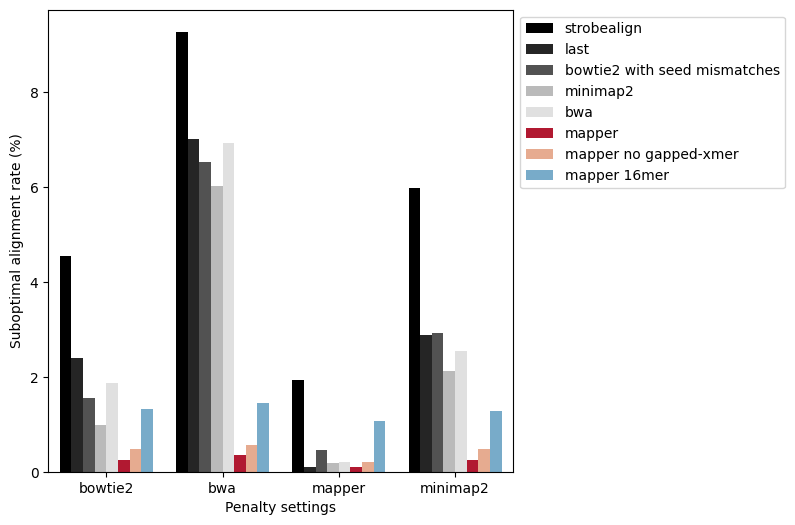

In [6]:
### penalty MG
# accuracy = (total_reads-reads_with_diff + reads_lowest_penalty_tool)/total_reads, max(accuracy = 100%)
total_reads = 88213196/4
allsam = glob.glob('%s/*/DRR163384*.samcompare.withtagclean.txt'%(folder))
allsam.sort()
print(allsam)
allscore = pd.DataFrame()
for samfile in allsam:
    tool = os.path.split(samfile)[-1].split('.samcompare.withtag')[0].split('.')[-1]
    score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
    score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    allscore = allscore.append(score_sum)
toolset1 = ['strobealign','last','bowtie2 with seed mismatches','bwa','minimap2','mapper', 'mapper no gapped-xmer',
                       'mapper 16mer']

legend_order = ['strobealign','last','bowtie2 with seed mismatches','minimap2','bwa','mapper', 'mapper no gapped-xmer',
               'mapper 16mer'
                   ]
allscore['sub'] = 100 - allscore['accuracy']
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6, 6))
allscoresub = allscore[allscore['tool'].isin(toolset1)]
allscoresub['tool'] = [x.replace('mapper (noancestor)','mapper') for x in allscoresub['tool']]
print(allscoresub.head())
sns.barplot(x='penalty', y='sub', data=allscoresub,ax=axs,hue = 'tool',palette=palette_set,
            hue_order = legend_order,
                 dodge=True)
axs.set_ylabel('Suboptimal alignment rate (%)') 
axs.set_xlabel('Penalty settings') 
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.savefig('%s/DRR163384_allclean.pdf'%(folder),bbox_inches='tight')
allscore.to_csv('%s/DRR163384_allclean.txt'%(folder),sep='\t',index = False)


['SNP_model_penalty/bowtie/DRR163384_all.fastq_DRR163384.fasta.bowtie.samcompare.withtag.txt', 'SNP_model_penalty/bwa/DRR163384_all.fastq_DRR163384.fasta.bwa.samcompare.withtag.txt', 'SNP_model_penalty/mapper/DRR163384_all.fastq_DRR163384.fasta.mapper.samcompare.withtag.txt', 'SNP_model_penalty/minimap/DRR163384_all.fastq_DRR163384.fasta.minimap.samcompare.withtag.txt']
bowtie reads no diff = 0.5361754719781381 11824438.0 reads with diff= 0.46382452802186197 10228861
bwa reads no diff = 0.4595415860456977 10134408.0 reads with diff= 0.5404584139543023 11918891
mapper reads no diff = 0.547179947997803 12067123.0 reads with diff= 0.45282005200219705 9986176
minimap reads no diff = 0.5054926249356162 11147780.0 reads with diff= 0.4945073750643838 10905519
                           tool     value   accuracy  penalty       sub
0  bowtie2 with seed mismatches   9058724  94.694050  bowtie2  5.305950
1                           bwa   8597251  92.601515  bowtie2  7.398485
2                    

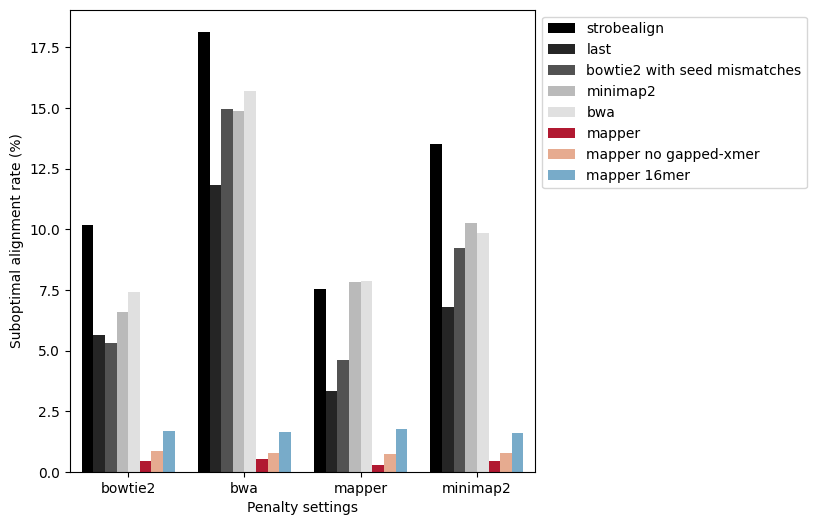

In [7]:
### penalty MG
# accuracy = (total_reads-reads_with_diff + reads_lowest_penalty_tool)/total_reads, max(accuracy = 100%)
total_reads = 88213196/4
allsam = glob.glob('%s/*/DRR163384*.samcompare.withtag.txt'%(folder))
allsam.sort()
print(allsam)
allscore = pd.DataFrame()
for samfile in allsam:
    tool = os.path.split(samfile)[-1].split('.samcompare.withtag')[0].split('.')[-1]
    score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
    score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    allscore = allscore.append(score_sum)
toolset1 = ['strobealign','last','bowtie2 with seed mismatches','bwa','minimap2','mapper', 'mapper no gapped-xmer',
                       'mapper 16mer']

legend_order = ['strobealign','last','bowtie2 with seed mismatches','minimap2','bwa','mapper', 'mapper no gapped-xmer',
               'mapper 16mer'
                   ]
allscore['sub'] = 100 - allscore['accuracy']
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6, 6))
allscoresub = allscore[allscore['tool'].isin(toolset1)]
allscoresub['tool'] = [x.replace('mapper (noancestor)','mapper') for x in allscoresub['tool']]
print(allscoresub.head())
sns.barplot(x='penalty', y='sub', data=allscoresub,ax=axs,hue = 'tool',palette=palette_set,
            hue_order = legend_order,
                 dodge=True)
axs.set_ylabel('Suboptimal alignment rate (%)') 
axs.set_xlabel('Penalty settings') 
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.savefig('%s/DRR163384.pdf'%(folder),bbox_inches='tight')
allscore.to_csv('%s/DRR163384.txt'%(folder),sep='\t',index = False)


In [9]:
### penalty
max_penalty = {'bowtie':0.6,
              'bwa':0.5,
              'minimap':0.6,
              'mapper':1.0}
palette_set = {
    'bowtie2':'#878787','bowtie2 with seed mismatches':'#525252','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
    'last':'#252525',
    'mapper 12mer':'#c6dbef',
    'mapper 14mer':'#9ecae1',
    'mapper 16mer':'#6baed6',
     'mapper 18mer':'#4292c6',
    'mapper 20mer':'#2171b5',
    'mapper 22mer':'#08519c',
    'mapper 24mer':'#08306b',
     'mapper no gapped-xmer':'#f4a582',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
    }
def compute_accuracy(samfile,tool,total_reads):
    score=pd.read_csv(samfile, sep='\t')
#     score = score.sort_values('readlen',ascending=False)
    score = score.drop_duplicates('readID') # remove short reads of the same ID, partial alignment by minimap and bwa
#     # all alignments
#     score['readlen'] = [len(x) for xin score['read']]
#     score['limit']=score['readlen']*max_penalty[tool]
#     score['minpenalty'] = [min(score.loc[x,'bowtie'],
#                                                   score.loc[x,'bwa'],
#                                                   score.loc[x,'minimap'],
#                                                   score.loc[x,'mapper']
#                                                  ) for x in score.index]
#     # removing those excending mapper penalty cutoff
#     score['fold']=score['minpenalty']/score['limit']
#     score = score[score['limit']>=score['minpenalty']]
    num_reads_no_diff = total_reads - score.shape[0]
    score_sum = {'tool':['bowtie2','bwa','minimap2','mapper',
                             'mapper 12mer','mapper 16mer',
                            'mapper 20mer','mapper 24mer','strobealign','bowtie2 with seed mismatches','last','mapper no gapped-xmer'],
                     'value':[0,0,0,0,0,0,0,0,0,0,0,0]}
    #score['minpenaltyall']=score.iloc[:,3:].min(axis=1)
    score_sum['value'][0]=score[score['bowtie']<=score['minpenalty']].shape[0]
    score_sum['value'][1]=score[score['bwa']<=score['minpenalty']].shape[0]
    score_sum['value'][2]=score[score['minimap']<=score['minpenalty']].shape[0]
    score_sum['value'][3]=score[score['mapper']<=score['minpenalty']].shape[0]
    score_sum['value'][4]=score[score['mapper.kmer12']<=score['minpenalty']].shape[0]
    score_sum['value'][5]=score[score['mapper.kmer16']<=score['minpenalty']].shape[0]
    score_sum['value'][6]=score[score['mapper.kmer20']<=score['minpenalty']].shape[0]
    score_sum['value'][7]=score[score['mapper.kmer24']<=score['minpenalty']].shape[0]
    score_sum['value'][8]=score[score['strobealign']<=score['minpenalty']].shape[0]
    score_sum['value'][9]=score[score['bowtieN1']<=score['minpenalty']].shape[0]
    score_sum['value'][10]=score[score['last']<=score['minpenalty']].shape[0]
    score_sum['value'][11]=score[score['mapper.nogapped']<=score['minpenalty']].shape[0]
    score_sum=pd.DataFrame(score_sum)
    score_sum['value']=score_sum['value']
    score_sum['accuracy']=(score_sum['value'] + num_reads_no_diff)/total_reads*100
    print(tool,'reads no diff =',num_reads_no_diff/total_reads,num_reads_no_diff,'reads with diff=',score.shape[0]/total_reads,score.shape[0])
    return [score_sum,num_reads_no_diff/total_reads*100]
folder = 'SNP_model_penalty/'


['SNP_model_penalty/bowtie/am0230_all.fastq_am0230.fasta.bowtie.samcompare.withtagclean.txt', 'SNP_model_penalty/bwa/am0230_all.fastq_am0230.fasta.bwa.samcompare.withtagclean.txt', 'SNP_model_penalty/mapper/am0230_all.fastq_am0230.fasta.mapper.samcompare.withtagclean.txt', 'SNP_model_penalty/minimap/am0230_all.fastq_am0230.fasta.minimap.samcompare.withtagclean.txt']
bowtie reads no diff = 0.7204475694872742 3422649.0 reads with diff= 0.2795524305127258 1328077
bwa reads no diff = 0.7200360534368853 3420694.0 reads with diff= 0.2799639465631148 1330032
mapper reads no diff = 0.7214646771882866 3427481.0 reads with diff= 0.2785353228117134 1323245
minimap reads no diff = 0.7203235884367989 3422060.0 reads with diff= 0.27967641156320105 1328666


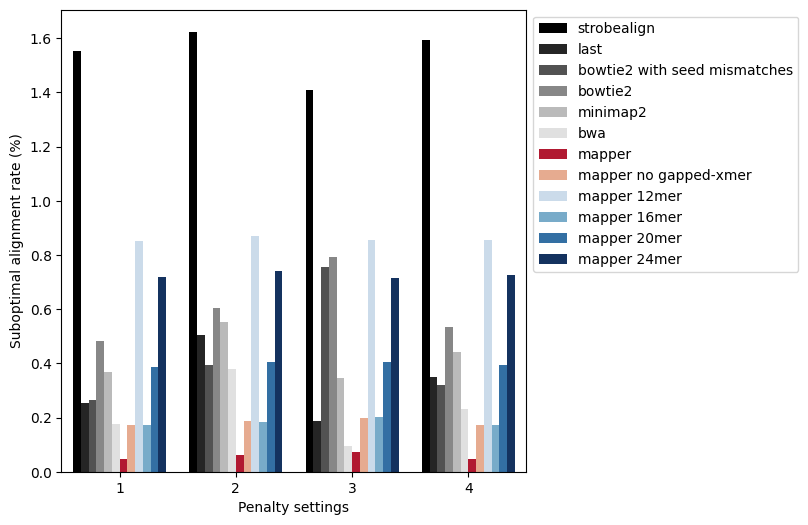

In [10]:
### penalty MG
# accuracy = (total_reads-reads_with_diff + reads_lowest_penalty_tool)/total_reads, max(accuracy = 100%)
total_reads = 19002904/4
allsam = glob.glob('%s/*/am0230*.samcompare.withtagclean.txt'%(folder))
allsam.sort()
print(allsam)
allscore = pd.DataFrame()
for samfile in allsam:
    tool = os.path.split(samfile)[-1].split('.samcompare.withtag')[0].split('.')[-1]
    score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
    score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    allscore = allscore.append(score_sum)
toolset1 = ['strobealign','last','bowtie2 with seed mismatches','bowtie2','bwa','minimap2','mapper', 'mapper no gapped-xmer',
                         'mapper 12mer','mapper 16mer',
                        'mapper 20mer','mapper 24mer']

legend_order = ['strobealign','last','bowtie2 with seed mismatches','bowtie2','minimap2','bwa','mapper', 'mapper no gapped-xmer',
                'mapper 12mer','mapper 16mer',
                        'mapper 20mer','mapper 24mer']
allscore['sub'] = 100 - allscore['accuracy']
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6, 6))
allscoresub = allscore[allscore['tool'].isin(toolset1)]
allscoresub['tool'] = [x.replace('mapper (noancestor)','mapper') for x in allscoresub['tool']]
sns.barplot(x='penalty', y='sub', data=allscoresub,ax=axs,hue = 'tool',palette=palette_set,
            hue_order = legend_order,
                 dodge=True)
axs.set_ylabel('Suboptimal alignment rate (%)') 
axs.set_xlabel('Penalty settings') 
axs.set_xticklabels([1, 2, 3, 4])
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.savefig('%s/am0230_allclean_withN1.pdf'%(folder),bbox_inches='tight')
allscore.to_csv('%s/am0230_allclean_withN1.txt'%(folder),sep='\t',index = False)


In [11]:
allscoresub['inaccuracy'] = 100 - allscoresub['accuracy']
allscoresub[allscoresub['penalty']=='bowtie2']

,tool,value,accuracy,penalty,sub,inaccuracy
0,bowtie2,1305138,99.517147,bowtie2,0.482853,0.482853
1,bwa,1319648,99.822574,bowtie2,0.177426,0.177426
2,minimap2,1310626,99.632667,bowtie2,0.367333,0.367333
3,mapper,1325814,99.952365,bowtie2,0.047635,0.047635
4,mapper 12mer,1287648,99.148993,bowtie2,0.851007,0.851007
5,mapper 16mer,1319963,99.829205,bowtie2,0.170795,0.170795
6,mapper 20mer,1309636,99.611828,bowtie2,0.388172,0.388172
7,mapper 24mer,1294009,99.282889,bowtie2,0.717111,0.717111
8,strobealign,1254308,98.447206,bowtie2,1.552794,1.552794
9,bowtie2 with seed mismatches,1315504,99.735346,bowtie2,0.264654,0.264654


In [12]:
print(0.182625/0.041741,0.490409/0.041741)

4.375194652739513 11.74885604082317


['SNP_model_penalty/bowtie/am0230_all.fastq_am0230.fasta.bowtie.samcompare.withtag.txt', 'SNP_model_penalty/bwa/am0230_all.fastq_am0230.fasta.bwa.samcompare.withtag.txt', 'SNP_model_penalty/mapper/am0230_all.fastq_am0230.fasta.mapper.samcompare.withtag.txt', 'SNP_model_penalty/minimap/am0230_all.fastq_am0230.fasta.minimap.samcompare.withtag.txt']
bowtie reads no diff = 0.7200000589383602 3420523.0 reads with diff= 0.27999994106163983 1330203
bwa reads no diff = 0.7196401139531095 3418813.0 reads with diff= 0.2803598860468905 1331913
mapper reads no diff = 0.7194245679502459 3417789.0 reads with diff= 0.2805754320497541 1332937
minimap reads no diff = 0.7195786496632304 3418521.0 reads with diff= 0.28042135033676957 1332205


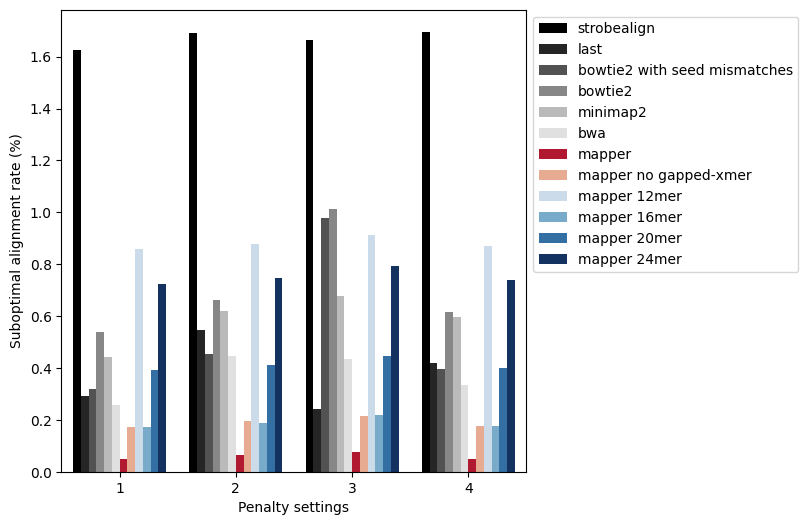

In [14]:
### penalty MG
# accuracy = (total_reads-reads_with_diff + reads_lowest_penalty_tool)/total_reads, max(accuracy = 100%)
total_reads = 19002904/4
allsam = glob.glob('%s/*/am0230*.samcompare.withtag.txt'%(folder))
allsam.sort()
print(allsam)
allscore = pd.DataFrame()
for samfile in allsam:
    tool = os.path.split(samfile)[-1].split('.samcompare.withtag.txt')[0].split('.')[-1]
    score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
    score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    allscore = allscore.append(score_sum)
toolset1 = ['strobealign','last','bowtie2 with seed mismatches','bowtie2','bwa','minimap2','mapper', 'mapper no gapped-xmer',
                         'mapper 12mer','mapper 16mer',
                        'mapper 20mer','mapper 24mer']

legend_order = ['strobealign','last','bowtie2 with seed mismatches','bowtie2','minimap2','bwa','mapper', 'mapper no gapped-xmer',
                'mapper 12mer','mapper 16mer',
                        'mapper 20mer','mapper 24mer']
allscore['sub'] = 100 - allscore['accuracy']
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6, 6))
allscoresub = allscore[allscore['tool'].isin(toolset1)]
allscoresub['tool'] = [x.replace('mapper (noancestor)','mapper') for x in allscoresub['tool']]
sns.barplot(x='penalty', y='sub', data=allscoresub,ax=axs,hue = 'tool',palette=palette_set,
            hue_order = legend_order,
                 dodge=True)
axs.set_ylabel('Suboptimal alignment rate (%)') 
axs.set_xlabel('Penalty settings') 
axs.set_xticklabels([1, 2, 3, 4])
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.savefig('%s/am0230_all1_withN1.pdf'%(folder),bbox_inches='tight')


In [ ]:
# ### penalty WGS
# # accuracy = (total_reads-reads_with_diff + reads_lowest_penalty_tool)/total_reads, max(accuracy = 100%)
# total_reads = 4750726 # PaDi
# allsam = glob.glob('%s/*/am_PaDi*.samcompare.withtagclean.txt'%(folder))
# allsam.sort()
# print(allsam)
# allscore = pd.DataFrame()
# for samfile in allsam:
#     tool = os.path.split(samfile)[-1].split('.samcompare.withtag')[0].split('.')[-1]
#     score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
#     score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
#     allscore = allscore.append(score_sum)
# toolset1 = ['strobealign','last','bowtie2N1','bowtie2','bwa','minimap2','mapper', 'mapper no gapped-xmer',
#                          'mapper 12mer','mapper 14mer','mapper 16mer',
#                         'mapper 18mer','mapper 20mer','mapper 22mer','mapper 24mer']

# legend_order = ['strobealign','last','bowtie2N1','bowtie2','minimap2','bwa','mapper', 'mapper no gapped-xmer',
#                 'mapper 12mer','mapper 14mer','mapper 16mer',
#                         'mapper 18mer','mapper 20mer','mapper 22mer','mapper 24mer']
# allscore['sub'] = 100 - allscore['accuracy']
# fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6, 6))
# allscoresub = allscore[allscore['tool'].isin(toolset1)]
# allscoresub['tool'] = [x.replace('mapper (noancestor)','mapper') for x in allscoresub['tool']]
# sns.barplot(x='penalty', y='sub', data=allscoresub,ax=axs,hue = 'tool',palette=palette_set,
#             hue_order = legend_order,
#                  dodge=True)
# axs.set_xticklabels([1, 2, 3, 4])
# axs.set_ylabel('Suboptimal alignment rate (%)') 
# axs.set_xlabel('Penalty settings') 
# plt.legend(bbox_to_anchor=(1.0, 1.0)) 
# plt.savefig('%s/am_PaDi_allclean.pdf'%(folder),bbox_inches='tight')
# allscore.to_csv('%s/am_PaDi_allclean.txt'%(folder),sep='\t',index = False)


In [ ]:
# allscoresub['inaccuracy'] = 100 - allscoresub['accuracy']
# allscoresub[allscoresub['penalty']=='bwa']

In [ ]:
# print(0.261160/0.008799
# ,0.382657/0.008799
# )

In [ ]:
# print(0.018734/0.002989,0.066600/0.002989)

In [ ]:
# ### penalty WGS
# # accuracy = (total_reads-reads_with_diff + reads_lowest_penalty_tool)/total_reads, max(accuracy = 100%)
# total_reads = 4750726 # PaDi
# allsam = glob.glob('%s/*/am_PaDi*.samcompare.withtag.txt'%(folder))
# allsam.sort()
# print(allsam)
# allscore = pd.DataFrame()
# for samfile in allsam:
#     tool = os.path.split(samfile)[-1].split('.samcompare.withtag.txt')[0].split('.')[-1]
#     score_sum,ymin = compute_accuracy(samfile,tool,total_reads)
#     score_sum['penalty'] = tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
#     allscore = allscore.append(score_sum)
# toolset1 = ['strobealign','last','bowtie2N1','bowtie2','bwa','minimap2','mapper', 'mapper no gapped-xmer',
#                          'mapper 12mer','mapper 14mer','mapper 16mer',
#                         'mapper 18mer','mapper 20mer','mapper 22mer','mapper 24mer']

# legend_order = ['strobealign','last','bowtie2N1','bowtie2','minimap2','bwa','mapper', 'mapper no gapped-xmer',
#                 'mapper 12mer','mapper 14mer','mapper 16mer',
#                         'mapper 18mer','mapper 20mer','mapper 22mer','mapper 24mer']
# allscore['sub'] = 100 - allscore['accuracy']
# fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(6, 6))
# allscoresub = allscore[allscore['tool'].isin(toolset1)]
# allscoresub['tool'] = [x.replace('mapper (noancestor)','mapper') for x in allscoresub['tool']]
# sns.barplot(x='penalty', y='sub', data=allscoresub,ax=axs,hue = 'tool',palette=palette_set,
#             hue_order = legend_order,
#                  dodge=True)
# axs.set_xticklabels([1, 2, 3, 4])
# axs.set_ylabel('Suboptimal alignment rate (%)') 
# axs.set_xlabel('Penalty settings') 
# plt.legend(bbox_to_anchor=(1.0, 1.0)) 
# plt.savefig('%s/am_PaDi_all1.pdf'%(folder),bbox_inches='tight')


In [2]:
# load
samplename = 'am0230'# 'am_PaDi_g0001'#'DRR163384'#'am0230'

max_penalty = 0.6
# ERR3278849 many reads with repeat within 
# samplename = 'am0230'#'am0230','Bifido',am_PaDi_g0001', 'ERR3278849','GCF_019974115','ERR3278849','DRR163384'

score = pd.read_csv('SNP_model_penalty/bowtie/%s_all.fastq_%s.fasta.bowtie.samcompare.withtagclean.txt'%(samplename,samplename),
                    sep='\t')
print(score.shape)
score['readID']=score['readID'] + score['read']
score = score.drop_duplicates('readID') # remove short reads of the same ID, partial alignment by minimap and bwa
print(score.shape)
# # score['limit']=score['readlen']*max_penalty
# # score['minpenalty'] = [min(score.loc[x,'bowtie'],score.loc[x,'bwa'],score.loc[x,'minimap'],score.loc[x,'mapper']) for x in score.index]
# # # removing those excending mapper penalty cutoff
# # score = score[score['limit']>=score['minpenalty']]
# print(score.shape)
score['sumtools'] = score['bowtie'] + score['mapper'] + score['minimap'] + score['bwa']  + score['strobealign']  + score['last']
score = score[(score['sumtools']!=6*score['mapper'])|
             (score['sumtools']!=6*score['bowtie'])|
  (score['sumtools']!=6*score['last'])|
 (score['sumtools']!=6*score['strobealign'])|
             (score['sumtools']!=6*score['minimap'])|
             (score['sumtools']!=6*score['bwa'])]
score.loc[score['tag2'].isna(),'tag2']='Others'
print(score.shape)
score.head()
#


(2592730, 28)
(2592730, 28)
(124953, 29)


,readID,read,mapper,bowtie,bwa,minimap,mapper.kmer12,mapper.kmer16,mapper.kmer20,mapper.kmer24,...,tagmapper.kmer16,tagmapper.kmer20,tagmapper.kmer24,tagstrobealign,tagbowtieN1,taglast,tagmapper.nogapped,tag2,minpenalty,sumtools
23,700536:HVG5YBCXX161014:HVG5YBCXX:1:1211:8184:7...,AAAAAAAACGCTACAGATTATACTTGCTTTATGTTTAGGCCTATGG...,32,1000,32,32,32,32,32,32,...,bestalignment,bestalignment,bestalignment,alignmentmissed,alignmentmissed,sameCHRsamePOS,bestalignment,RightSoftWrongSoft,32,2434
31,7001174F:HVTFNBCXX161011:HVTFNBCXX:2:2116:1362...,ATCCTAATGTTGCCAACTATATTGAATTGTCCGGTTATGTAAACGC...,11,11,11,11,11,11,11,11,...,bestalignment,bestalignment,bestalignment,sameCHRclosePOS,bestalignment,bestalignment,bestalignment,RightSoftWrongSoft,11,474
40,700536:HVG5YBCXX161014:HVG5YBCXX:1:1214:10260:...,ATCCTAATTAGTTCTTTACGATAAATGGTGAGTAATGTGTTTCGGC...,6,6,6,6,6,6,6,6,...,bestalignment,bestalignment,bestalignment,alignmentmissed,bestalignment,bestalignment,bestalignment,RightSoftWrongSoft,6,1030
73,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1210:1637...,ATCCTACAAAGATACATACCAGCAAGCCACCCAAAGGAAGCATTAT...,8,8,8,8,8,8,8,8,...,bestalignment,bestalignment,bestalignment,sameCHRclosePOS,bestalignment,bestalignment,bestalignment,RightSoftRightInWrongSoft,8,448
165,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1209:1522...,ATCCTACACAGAGCATGGGTACTCCGGTCCCGGGTGACTTAAAATA...,30,30,30,30,30,30,1000,1000,...,bestalignment,alignmentmissed,alignmentmissed,alignmentmissed,bestalignment,bestalignment,bestalignment,RightSoftWrongSoft,30,1150


In [16]:
# score[score['read']=='TAAACTTATTTTTTTGTTCGCTTTATCTCTCTAAAGCGCTGCAAAGATACGGCTTTTTTTATTACCACCAAACCTTTTGACGAAAAAATGTGGATGAATATGAATTTTGTTTGGATATGGCTACGTAAGTGTCTGATGGTCCTAAAAAC']


In [17]:
# print(score[score['mapper']==1000].shape)
# score[score['mapper']==1000].head()

In [18]:
# score[score['mapper']==1000][score['mapper (15mer)']<1000].to_csv('am_PaDi_mapper59_noalignment.txt',
#                                                                  sep='\t',index=False)


In [19]:
# list(score['readID'])[:10]

In [3]:
scoresum = pd.DataFrame(score.groupby(['tag2'])['tag2'].count())
scoresum.columns = ['count']
scoresum.reset_index(inplace=True)
scoresum.sort_values('count')

,tag2,count
1,RightSoftRightInWrongSoftWrongIn,1026
3,RightSoftWrongSoftWrongIn,3930
0,RightSoftRightInWrongSoft,16551
2,RightSoftWrongSoft,103446


         Query: GCCGTAAACCATACATCGCTTAATATGAGATTAAGCGATGTATGGTTTACGGCTCTCTCGGAAAACGAGTCAGGGCAAATGATTACCGTTTACGGGCGGGACGAGTTGAATGAGTTCACCGAATCCGGTAAGTTCAAGGAACGTGTCGAG
      RC Query: CTCGACACGTTCCTTGAACTTACCGGATTCGGTGAACTCATTCAACTCGTCCCGCCCGTAAACGGTAATCATTTGCCCTGACTCGTTTTCCGAGAGAGCCGTAAACCATACATCGCTTAATCTCATATTAAGCGATGTATGGTTTACGGC
 Difference   :                                                                                                                                  !!!!!! !   !!   !!!! 
 Aligned ref  : CTCGACACGTTCCTTGAACTTACCGGATTCGGTGAACTCATTCAACTCGTCCCGCCCGTAAACGGTAATCATTTGCCCTGACTCGTTTTCCGAGAGAGCCGTAAACCATACATCGCTTAATCTCATATT------TATAT--TTT----C(scaffold31|size14179, offset 420)
 Penalty      : 48.0 (length: 150)
         Query: GCCGTAAACCATACATCGCTTAATATGAGATTAAGCGATGTATGGTTTACGGCTCTCTCGGAAAACGAGTCAGGGCAAATGATTACCGTTTACGGGCGGGACGAGTTGAATGAGTTCACCGAATCCGGTAAGTTCAAGGAACGTGTCGAG
 Difference   :  !!!!   !!   ! !!!!!!                                                                                                                                 
 Aligned ref  : G----AAA--ATATA------AATATGAGATTAAGCGATGTATGGTTTACGGCTCTCTCGGAAAACGAGTCAGGGCAAATGATTACCGTTTACGGGCGGGACGAGTTGAATGAGTTCACCGAATCCGGTAAGTTCAAGGAACGTGTCGAG(scaffold30|size25263, offset 10103)
 Penalty      : 48.0 (length: 150)


In [4]:
# check kmer
score2sub = score
print(score2sub[score2sub['mapper']==1000].shape,
      score2sub[score2sub['bowtie']==1000].shape,
      score2sub[score2sub['bwa']==1000].shape,
      score2sub[score2sub['minimap']==1000].shape,
      score2sub[score2sub['strobealign']==1000].shape,
      score2sub[score2sub['mapper.nogapped']==1000].shape,
      score2sub[score2sub['mapper.kmer16']==1000].shape,
      # score2sub[score2sub['mapper.kmer20']==1000].shape,
      #  score2sub[score2sub['mapper.kmer24']==1000].shape,
     )
score2sub[score2sub['mapper']==1000].head()
#(2952, 19) (30212, 19) (3785, 19) (24534, 19) (51418, 19) (20091, 19) (36265, 19)
#(3018, 19) (30273, 19) (3838, 19) (24593, 19) (51487, 19) (20161, 19) (36330, 19)
#(94, 19) (6554, 19) (689, 19) (6772, 19) (119, 19) (2508, 19) (7206, 19)
#(94, 19) (6554, 19) (689, 19) (6772, 19) (278, 19) (4208, 19) (7660, 19)
#(3018, 19) (30273, 19) (3838, 19) (24593, 19) (36725, 19) (20932, 19) (36330, 19)
#(3018, 19) (30273, 19) (3898, 19) (24648, 19) (36725, 19) (9657, 19) (29143, 19)
#(2785, 19) (28966, 19) (3712, 19) (24401, 19) (2797, 19) (10537, 19) (23742, 19)
#(2636, 29) (26274, 29) (3644, 29) (24117, 29) (71064, 29) (16048, 29) (7021, 29) (31451, 29)



(3278, 29) (26288, 29) (3260, 29) (23852, 29) (77023, 29) (11380, 29) (9405, 29)


,readID,read,mapper,bowtie,bwa,minimap,mapper.kmer12,mapper.kmer16,mapper.kmer20,mapper.kmer24,...,tagmapper.kmer16,tagmapper.kmer20,tagmapper.kmer24,tagstrobealign,tagbowtieN1,taglast,tagmapper.nogapped,tag2,minpenalty,sumtools
2589452,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1201:1244...,AAAACCTCTTGCGTAGTATCACCGTTCGGAATACGTACCAAACCGG...,1000,54,54,1000,1000,54,54,1000,...,bestalignment,bestalignment,alignmentmissed,sameCHRclosePOS,bestalignment,bestalignment,bestalignment,RightSoftWrongSoft,54,2642
2589453,7001174F:HVTFNBCXX161011:HVTFNBCXX:2:2103:1803...,AAACAAGAATCATGACAGAAATTTTATAAACCGTAATTGTTTTCCA...,1000,60,60,60,60,60,60,1000,...,bestalignment,bestalignment,alignmentmissed,alignmentmissed,bestalignment,bestalignment,bestalignment,RightSoftWrongSoft,60,2240
2589454,700536:HVG5YBCXX161014:HVG5YBCXX:1:1212:5514:8...,AAACATTGGTAGCTGACGTAT,1000,0,1000,1000,0,1000,1000,1000,...,alignmentmissed,alignmentmissed,alignmentmissed,alignmentmissed,bestalignment,alignmentmissed,bestalignment,RightSoftWrongSoft,0,5000
2589455,7001174F:HVTFNBCXX161011:HVTFNBCXX:2:2108:8951...,AAACCGCACGATGCTAGTGCTTTCCCGCTG,1000,6,1000,1000,1000,1000,1000,1000,...,alignmentmissed,alignmentmissed,alignmentmissed,alignmentmissed,bestalignment,bestalignment,alignmentmissed,RightSoftWrongSoft,6,4012
2589456,700536:HVG5YBCXX161014:HVG5YBCXX:1:1210:9104:4...,AAACTAACTTGCAGTATTCATTTTTAAAAATTATATAAGTATGAAA...,1000,53,53,53,1000,1000,1000,1000,...,alignmentmissed,alignmentmissed,alignmentmissed,sameCHRclosePOS,bestalignment,sameCHRsamePOS,alignmentmissed,RightSoftRightInWrongSoft,53,1673


In [ ]:
# score2sub[score2sub['readID']=='ao_BiBi_SL-NXA:H2FHHBGX2161121:H2FHHBGX2:1:11205:16081:6690ACATAACGCAACGGGATGCCAAAACTTGGAGATACGACCGTTTTCGGTGGGAAAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGTGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG']

In [5]:
if 'am' in samplename:
        # check all causes
    score2sub = score
    score2sub.index = range(0,score2sub.shape[0])
    penaltykmer = pd.DataFrame(
        {
        'readID': score2sub['readID'],
        'bowtie' : '',
        'bwa' :'',
        'minimap' : '',
        'mapper' : '',
        'strobealign': '',
          'last': ''}
    )
    penaltykmer.index = score2sub.index
    set_tool_col = {}
    colnames = list(score2sub.columns)
    for tool in ['bowtie','bwa','minimap','mapper','strobealign','last']:
        set_tool_col.setdefault(tool,colnames.index(tool))
    print(score2sub.shape)
    print(set_tool_col)
    for i in score2sub.index:
        readinfor = list(score2sub.loc[i,:])
        readID = readinfor[0]
        for tool in ['bowtie','bwa','minimap','mapper','strobealign','last']:
            tag = ''
            minscore = readinfor[-2]
            toolscore = readinfor[set_tool_col[tool]]
            if toolscore == 1000:
                # no alignment
                toolkmer = [score2sub.loc[i,'mapper.kmer12'],
                            score2sub.loc[i,'mapper.kmer16'],
                             score2sub.loc[i,'mapper.kmer20'],
                            score2sub.loc[i,'mapper.kmer24'],
                            score2sub.loc[i,'mapper.nogapped'],
                            score2sub.loc[i,'mapper']
                           ]
                if 1000 in toolkmer:
                    if  toolkmer[0]!= 1000:
                        tag = 'k-mer too long'
                    elif toolkmer[3]!= 1000:
                        tag = 'k-mer too short'
                    elif toolkmer[1]!= 1000 or  toolkmer[2]!= 1000:
                        tag = 'k-mer suboptimal'
                    elif toolkmer[4]== 1000 and toolkmer[5]!= 1000:
                        tag = 'no gapped k-mer'
                    penaltykmer.loc[i,tool] = tag
    
            elif toolscore > minscore:
                    # suboptimal alignment
                    toolkmer = [score2sub.loc[i,'mapper.kmer12'],
                            score2sub.loc[i,'mapper.kmer16'],
                             score2sub.loc[i,'mapper.kmer20'],
                            score2sub.loc[i,'mapper.kmer24'],
                            score2sub.loc[i,'mapper.nogapped'],
                            score2sub.loc[i,'mapper']
                           ]
                    if toolscore in toolkmer:
                        if toolkmer[0]< toolscore:
                            tag = 'k-mer too long'
                        elif toolkmer[3]< toolscore:
                            tag = 'k-mer too short'
                        elif toolkmer[1]< toolscore and toolkmer[2]< toolscore:
                            tag = 'k-mer suboptimal'
                        elif toolkmer[4]>= toolscore and toolkmer[5]<toolscore:
                            tag = 'no gapped k-mer'
                        penaltykmer.loc[i, tool] = tag
    
    
penaltykmer.head()


(124953, 29)
{'bowtie': 3, 'bwa': 4, 'minimap': 5, 'mapper': 2, 'strobealign': 10, 'last': 12}


,readID,bowtie,bwa,minimap,mapper,strobealign,last
0,700536:HVG5YBCXX161014:HVG5YBCXX:1:1211:8184:7...,,,,,,
1,7001174F:HVTFNBCXX161011:HVTFNBCXX:2:2116:1362...,,,,,,
2,700536:HVG5YBCXX161014:HVG5YBCXX:1:1214:10260:...,,,,,,
3,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1210:1637...,,,,,,
4,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1209:1522...,,,,,k-mer too long,


In [78]:
# check all causes
if 'DRR' in samplename:
    score2sub = score
    score2sub.index = range(0,score2sub.shape[0])
    penaltykmer = pd.DataFrame(
        {
#             'readID': ['DRR163384.1356761GATCACTTGGCCCTTTCTCTTCTTATCTCCTCCCAGTTCAAAATGCTTGCATCTTTTAATAGCCAGCATTCTCTTAGATCTGCAGTTGGGCTCAACAGATC',
#  'DRR163384.1357745ATCTTTCCTATCTGACTCCTTCCAGTGGTCTCTGTTCCCTCCGTCTCCTGGACCACGGCTAGAGTTCCCAGTTTGGCCCTTTGGGCCATTCATCCCATCTA',
#  'DRR163384.1357979GTTGAAGAAGAGGATCCGGGTGGCCTCAGTGAAAAGGATTTTCTCGTAGGCCTTCTCAATGCACCCAGCGATCTCATCCCTGATAGTGTCGAGCAGGATGT',
#  'DRR163384.1358444GCAGAATTTATCTGAAGATCCACAATCTAGAAATGGAACCACTGCTCTTTTGACAGGTGCCATCTCAGTGGCATCACTGGAAAGTCCAGATTGCCTGACAC',
#  'DRR163384.1358566CTTCGGTTCCCGCCTCCTCCCCGTTCACCGCCGGGGCGGCTCGTCCGCTCCGGGCCGGGACGGGGTCCGGGGAGCGTGGTTTGGGAGCCGGAGAGGCGGCC'],
        'readID': score2sub['readID'],
        'bowtie' : '',
        'bwa' :'',
        'minimap' : '',
        'mapper' : '',
        'strobealign': '',
          'last': ''}
    )
    penaltykmer.index = score2sub.index
    set_tool_col = {}
    colnames = list(score2sub.columns)
    for tool in ['bowtie','bwa','minimap','mapper','strobealign','last']:
        set_tool_col.setdefault(tool,colnames.index(tool))
    print(score2sub.shape)
    print(set_tool_col)
    for i in score2sub.index:
        readinfor = list(score2sub.loc[i,:])
        readID = readinfor[0]
        for tool in ['bowtie','bwa','minimap','mapper','strobealign','last']:
            tag = ''
            minscore = readinfor[-2]
            toolscore = readinfor[set_tool_col[tool]]
            if toolscore > minscore:
                    # suboptimal alignment
                    toolkmer = [
                        readinfor[7],#mapper.kmer16
                        readinfor[8],#mapper.nogapped
                        readinfor[2]#mapper
                           ]
                    if toolkmer[1]>= toolscore and toolkmer[2]<toolscore:
                            tag = 'no gapped k-mer'
                    elif toolkmer[0]>= toolscore and toolkmer[2]<toolscore:
                            tag = 'k-mer suboptimal'
                    penaltykmer.loc[i,tool] = tag 
        if i%100000==0:
            print('processed %s reads'%(i))
penaltykmer.head(10)


(1294120, 21)
{'bowtie': 4, 'bwa': 3, 'minimap': 5, 'mapper': 2, 'strobealign': 9, 'last': 6}
processed 0 reads
processed 100000 reads
processed 200000 reads
processed 300000 reads
processed 400000 reads
processed 500000 reads
processed 600000 reads
processed 700000 reads
processed 800000 reads
processed 900000 reads
processed 1000000 reads
processed 1100000 reads
processed 1200000 reads


,readID,bowtie,bwa,minimap,mapper,strobealign,last
0,DRR163384.12AGGGAAAGAGGAGTGACATCCAAGAGCAGCAAAT...,,,,,,
1,DRR163384.15GTAAAAGAAGAACACAACATATTTTCCTTTGTAG...,,,,,,
2,DRR163384.1354145CCAAAGACATGCCTTCTCTCTGAGTGCCC...,,,,,,
3,DRR163384.1354153CCTGTCTGTTCAAGAACCAGTCTGGGATC...,,,,,,
4,DRR163384.1354155GCCCTTCCCAATCCTGCAACACAATGCAC...,,,,,,
5,DRR163384.1354200CACCCATCCTTTTTATAAATGCTCCGGAG...,,,,,,
6,DRR163384.1354204GGCCAATTTGGGGGATGACACAACTTTAA...,,no gapped k-mer,,,no gapped k-mer,no gapped k-mer
7,DRR163384.1354215GTCAGTCTGAGTAGTGGTCGATCTGGACC...,,,,,,
8,DRR163384.1354234TTCGAATTCGGTGAATTGCCACCTCCGGC...,,,,,,
9,DRR163384.1354241CTCTCCATCGCGGACTCAGTCGCTTCAGC...,,,,,,


In [6]:
score2sub = score2sub.merge(penaltykmer,
                                       left_on = 'readID',right_on = 'readID',how = 'left')
score2sub.head()

,readID,read,mapper_x,bowtie_x,bwa_x,minimap_x,mapper.kmer12,mapper.kmer16,mapper.kmer20,mapper.kmer24,...,tagmapper.nogapped,tag2,minpenalty,sumtools,bowtie_y,bwa_y,minimap_y,mapper_y,strobealign_y,last_y
0,700536:HVG5YBCXX161014:HVG5YBCXX:1:1211:8184:7...,AAAAAAAACGCTACAGATTATACTTGCTTTATGTTTAGGCCTATGG...,32,1000,32,32,32,32,32,32,...,bestalignment,RightSoftWrongSoft,32,2434,,,,,,
1,7001174F:HVTFNBCXX161011:HVTFNBCXX:2:2116:1362...,ATCCTAATGTTGCCAACTATATTGAATTGTCCGGTTATGTAAACGC...,11,11,11,11,11,11,11,11,...,bestalignment,RightSoftWrongSoft,11,474,,,,,,
2,700536:HVG5YBCXX161014:HVG5YBCXX:1:1214:10260:...,ATCCTAATTAGTTCTTTACGATAAATGGTGAGTAATGTGTTTCGGC...,6,6,6,6,6,6,6,6,...,bestalignment,RightSoftWrongSoft,6,1030,,,,,,
3,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1210:1637...,ATCCTACAAAGATACATACCAGCAAGCCACCCAAAGGAAGCATTAT...,8,8,8,8,8,8,8,8,...,bestalignment,RightSoftRightInWrongSoft,8,448,,,,,,
4,7001174F:HVTFNBCXX161011:HVTFNBCXX:1:1209:1522...,ATCCTACACAGAGCATGGGTACTCCGGTCCCGGGTGACTTAAAATA...,30,30,30,30,30,30,1000,1000,...,bestalignment,RightSoftWrongSoft,30,1150,,,,,k-mer too long,


In [7]:
score2subtoolall = pd.DataFrame()
for tool in ['strobealign','last','bowtie','minimap','bwa','mapper']:
    score2subbowtie = score2sub[score2sub['%s_x'%(tool)]>score2sub['minpenalty']]
    score2subbowtie.loc[score2subbowtie['%s_y'%(tool)]!='','tag2']=score2subbowtie.loc[score2subbowtie['%s_y'%(tool)]!='','%s_y'%(tool)]
    score2subbowtie['tag2'] = score2subbowtie['tag2'].replace('WrongSoftWrongIn','WrongSoft').replace(
        'RightSoftRightIn','RightIn').replace(
        'RightInWrongSoft','Indels missing').replace(
        'RightSoft','Soft clips missing').replace(
        'WrongSoft','Misassigned soft clips').replace(
        'RightSoftWrongIn','Soft clips missing').replace(
        'RightSoftWrongSoft','Misassigned soft clips').replace(
        'RightInWrongIn','Indels missing').replace(
        'RightIn','Indels missing').replace(
        'RightInWrongSoftWrongIn','Indels missing').replace(
        'RightSoftRightInWrongIn','Indels missing').replace(
        'RightSoftWrongSoftWrongIn','Soft clips missing').replace(
        'RightSoftRightInWrongSoftWrongIn','Indels missing').replace(
        'RightSoftRightInWrongSoft','Indels missing').replace(
        'WrongIn','Others')
    score2subtool = pd.DataFrame(score2subbowtie.groupby('tag2')['tag2'].count())
    score2subtool.columns=['count']
    score2subtool.reset_index(inplace=True)
    score2subtool['tool']=tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    score2subtool['total'] = score2subbowtie.shape[0]
    score2subtoolall = score2subtoolall.append(score2subtool)
#score2subtoolall = score2subtoolall.sort_values('count')
score2subtoolall.to_csv("SNP_model_penalty/%s_reason.txt"%(samplename),sep='\t',index = False)
score2subtoolall.sort_values('count')



,tag2,count,tool,total
2,Soft clips missing,8,mapper,3983
2,Soft clips missing,17,bowtie2,33793
2,Soft clips missing,17,strobealign,117969
2,Soft clips missing,17,minimap2,28824
5,k-mer too short,20,mapper,3983
5,k-mer too short,29,last,18875
5,k-mer too short,29,bwa,14132
6,no gapped k-mer,68,last,18875
3,k-mer suboptimal,112,last,18875
4,k-mer too long,160,last,18875


In [113]:
score2subtoolall[score2subtoolall['tag2'].isin([
    'k-mer suboptimal', 'k-mer too long',
       'k-mer too short'
])].sort_values(['tool']).groupby('tool')['count'].sum()

tool
bowtie2        14753
bwa            28317
last           29653
minimap2       15104
strobealign    34928
Name: count, dtype: int64

In [8]:
score2subtoolall[score2subtoolall['tag2'].isin([
    'Indels missing', 'Misassigned soft clips',
       'Soft clips missing'
])].sort_values(['tool']).groupby('tool')['count'].sum()

tool
bowtie2        18254
bwa            11041
last           18506
mapper          2793
minimap2       11458
strobealign    73344
Name: count, dtype: int64

In [13]:
score2subtoolall[score2subtoolall['tag2'].isin([
    'Others'
])].sort_values(['tool']).groupby('tool')['count'].sum()

Series([], Name: count, dtype: int64)

In [10]:
score2subtoolall['tag2'].unique()

array(['Indels missing', 'Misassigned soft clips', 'Soft clips missing',
       'k-mer suboptimal', 'k-mer too long', 'k-mer too short',
       'no gapped k-mer'], dtype=object)

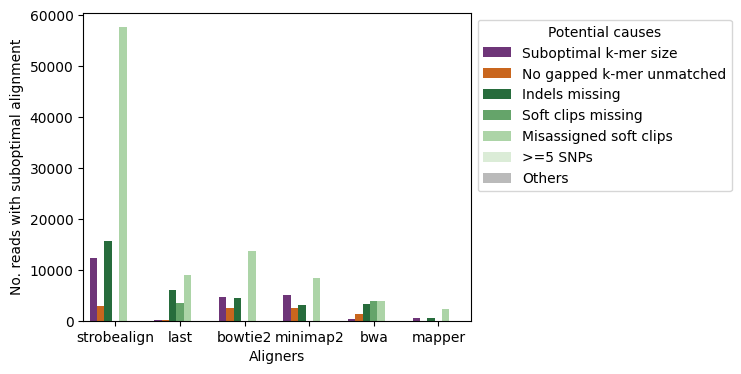

In [11]:
score2subtoolall['tag2'] = [
    x.replace('k-mer too short','Short k-mers unmatched').replace(
        'k-mer too long','Long k-mers unmatched').replace(
        'k-mer suboptimal','Suboptimal k-mer size').replace(
        'no gapped k-mer','No gapped k-mer unmatched')  for x in score2subtoolall['tag2'] 
]
palette_set = {
    'Suboptimal k-mer size':'#762a83',
    'No gapped k-mer unmatched':'#e66101',
    'Soft clips missing':'#5aae61',
    'Indels missing':'#1b7837',
    'Misassigned soft clips':'#a6dba0',
    '>=5 SNPs':'#d9f0d3',
    'Others':'#bababa',

}
legend_order = [ 'Suboptimal k-mer size', 
                'No gapped k-mer unmatched',
                'Indels missing', 
                'Soft clips missing','Misassigned soft clips', '>=5 SNPs',
                'Others']
if 'am20' in samplename:
    score2subtoolall['tag2'] = [
        x.replace('k-mer too short','Short k-mers unmatched').replace(
            'k-mer too long','Long k-mers unmatched').replace(
            'k-mer suboptimal','Short and long k-mers unmatched').replace(
            'no gapped k-mer','No gapped k-mer unmatched')  for x in score2subtoolall['tag2'] 
    ]
    palette_set = {
        'Short k-mers unmatched':'#c2a5cf',
        'Long k-mers unmatched':'#762a83',
         'Short and long k-mers unmatched':'#9970ab',
        'No gapped k-mer unmatched':'#e66101',
        'Soft clips missing':'#5aae61',
        'Indels missing':'#1b7837',
        'Misassigned soft clips':'#a6dba0',
        '>=5 SNPs':'#d9f0d3',
        'Others':'#bababa',
    
    }
    legend_order = [ 'Short k-mers unmatched','Short and long k-mers unmatched', 'Long k-mers unmatched', 
                    'No gapped k-mer unmatched',
                    'Indels missing', 
                    'Soft clips missing','Misassigned soft clips', '>=5 SNPs',
                    'Others']

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(5, 4))
sns.barplot(data = score2subtoolall,
            x='tool',y='count',hue='tag2',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('Aligners') 
axs.set_ylabel('No. reads with suboptimal alignment')
plt.sca(axs)
plt.legend(title = 'Potential causes', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('%s_bowtie_allwrongalignment.pdf'%(samplename),bbox_inches='tight')


In [120]:
score2subtoolall = pd.DataFrame(
{
        'tool':['strobealign','last','bowtie','minimap','bwa','mapper'],
        'count':0
    }
)
for tool in ['bowtie','minimap','bwa','mapper','strobealign','last']:
    score2subbowtie = score2sub[score2sub['%s_x'%(tool)]>score2sub['minpenalty']]
    score2subtoolall.loc[score2subtoolall['tool']==tool,'count']= score2subbowtie.shape[0]
    score2subtoolall.loc[score2subtoolall['tool']==tool,'tool']= tool.replace('bowtie','bowtie2').replace('minimap','minimap2')

score2subtoolall.tail()


,tool,count
1,last,530416
2,bowtie2,342206
3,minimap2,218424
4,bwa,412732
5,mapper,52788


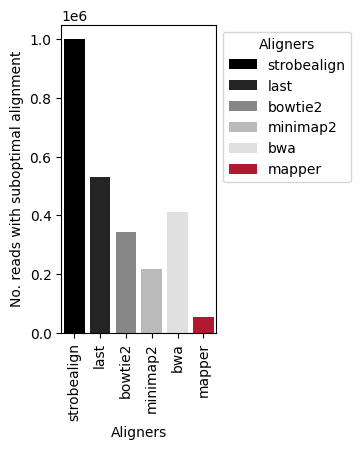

In [121]:
palette_set = {
    'bowtie2':'#878787','bowtie2N1':'#525252','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
    'last':'#252525',
     'mapper no gapped-xmer':'#f4a582',
    'mapper 12mer':'#c6dbef',
    'mapper 14mer':'#9ecae1',
    'mapper 16mer':'#6baed6',
     'mapper 18mer':'#4292c6',
    'mapper 20mer':'#2171b5',
    'mapper 22mer':'#08519c',
    'mapper 24mer':'#08306b',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
    }

legend_order = ['strobealign', 'last','bowtie2', 'minimap2',
                'bwa', 
                'mapper']

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2,4))
sns.barplot(data = score2subtoolall,
            x='tool',y='count',hue='tool',palette=palette_set,hue_order = legend_order,dodge=False)

axs.set_xlabel('Aligners') 
axs.set_ylabel('No. reads with suboptimal alignment')
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('%s_bowtie_allwrongalignmentall.pdf'%(samplename),bbox_inches='tight')


In [122]:
score2subtoolall = pd.DataFrame()
for tool,tooltag in zip(['strobealign','last','bowtie','minimap','bwa','mapper'],['tagstrobealign','taglast',
                                                                                  'tagbowtie','tagminimap','tagbwa','tagmapper']):
    score2subbowtie = score2sub[score2sub['%s_x'%(tool)]>score2sub['minpenalty']]
    score2subbowtie['tag1'] = score2subbowtie[tooltag].replace('alignmentmissed',
                                                               'Failed to align').replace('diffCHR',
                                                               'Wrong sites').replace('sameCHRdiffPOS',
                                                               'Wrong sites').replace('sameCHRclosePOS',
                                                               'Close sites').replace('sameCHRsamePOS',
                                                               'Same sites')
    score2subtool = pd.DataFrame(score2subbowtie.groupby('tag1')['tag1'].count())
    score2subtool.columns=['count']
    score2subtool.reset_index(inplace=True)
    score2subtool['tool']=tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    score2subtoolall = score2subtoolall.append(score2subtool)
score2subtoolall.to_csv("SNP_model_penalty/%s_reason2.txt"%(samplename),sep='\t',index = False)

score2subtoolall


,tag1,count,tool
0,Close sites,253844,strobealign
1,Failed to align,8099,strobealign
2,Same sites,123929,strobealign
3,Wrong sites,613736,strobealign
0,Close sites,212117,last
1,Failed to align,4019,last
2,Same sites,261188,last
3,Wrong sites,53092,last
0,Close sites,111533,bowtie2
1,Failed to align,31154,bowtie2


In [123]:
penaltykmer.head()

,readID,bowtie,bwa,minimap,mapper,strobealign,last
0,DRR163384.12AGGGAAAGAGGAGTGACATCCAAGAGCAGCAAAT...,,,,,,
1,DRR163384.15GTAAAAGAAGAACACAACATATTTTCCTTTGTAG...,,,,,,
2,DRR163384.1354145CCAAAGACATGCCTTCTCTCTGAGTGCCC...,,,,,,
3,DRR163384.1354153CCTGTCTGTTCAAGAACCAGTCTGGGATC...,,,,,,
4,DRR163384.1354155GCCCTTCCCAATCCTGCAACACAATGCAC...,,,,,,


In [124]:
score2sub[score2sub['%s_x'%('bowtie')]>score2sub['minpenalty']][score2sub['%s_x'%('mapper')]==score2sub['minpenalty']][score2sub['%s'%('mapper.kmer16')]>score2sub['minpenalty']].head()


,readID,read,mapper_x,bwa_x,bowtie_x,minimap_x,last_x,mapper.kmer16,mapper.nogapped,strobealign_x,...,tagstrobealign,tag2,minpenalty,sumtools,bowtie_y,bwa_y,minimap_y,mapper_y,strobealign_y,last_y
139,DRR163384.1356761GATCACTTGGCCCTTTCTCTTCTTATCTC...,GATCACTTGGCCCTTTCTCTTCTTATCTCCTCCCAGTTCAAAATGC...,19,20,20,20,20,1000,19,24,...,sameCHRsamePOS,RightSoftRightInWrongSoft,19,123,k-mer suboptimal,k-mer suboptimal,k-mer suboptimal,,k-mer suboptimal,k-mer suboptimal
203,DRR163384.1357745ATCTTTCCTATCTGACTCCTTCCAGTGGT...,ATCTTTCCTATCTGACTCCTTCCAGTGGTCTCTGTTCCCTCCGTCT...,18,30,30,30,18,30,18,30,...,diffCHR,RightSoftWrongSoft,18,156,k-mer suboptimal,k-mer suboptimal,k-mer suboptimal,,k-mer suboptimal,
222,DRR163384.1357979GTTGAAGAAGAGGATCCGGGTGGCCTCAG...,GTTGAAGAAGAGGATCCGGGTGGCCTCAGTGAAAAGGATTTTCTCG...,42,42,59,42,42,59,59,528,...,diffCHR,RightSoftWrongSoft,42,755,no gapped k-mer,,,,,
253,DRR163384.1358444GCAGAATTTATCTGAAGATCCACAATCTA...,GCAGAATTTATCTGAAGATCCACAATCTAGAAATGGAACCACTGCT...,0,66,66,66,66,1000,0,66,...,diffCHR,RightSoftWrongSoft,0,330,k-mer suboptimal,k-mer suboptimal,k-mer suboptimal,,k-mer suboptimal,k-mer suboptimal
264,DRR163384.1358566CTTCGGTTCCCGCCTCCTCCCCGTTCACC...,CTTCGGTTCCCGCCTCCTCCCCGTTCACCGCCGGGGCGGCTCGTCC...,12,90,90,90,1000,1000,12,90,...,diffCHR,RightSoftWrongSoft,12,1372,k-mer suboptimal,k-mer suboptimal,k-mer suboptimal,,k-mer suboptimal,k-mer suboptimal


In [125]:
list(score2sub[score2sub['%s_x'%('mapper')]>score2sub['minpenalty']][score2sub['tagmapper']=='alignmentmissed']['readID'])[:10]

['DRR163384.2039CTTTCAAATGCAACTCGCTCTGCCACAGAAACCGCACTGATTCTTCTGGGCTGAGTTACTACGATGTTACACTCTGCTGCTCGGTCATTCTGGATAAAGTC',
 'DRR163384.3686GTCACTTTTTGCCATATCTTCAAACTTCGACTTCTCCTTTGCAGACATGGTCTTCCATCTCTCCGAACACTTCTTGGAGAATTCCGCGAAATTGACGGAAG',
 'DRR163384.6611GTTTGACTGGTGAAGCCACACTCGCCCAATTTCTTGCCATCATCCAAGAGTTGGTCATCCTTTTACAGCCGCTGCTCGTCAGGAGGCCGCTTGAGGATGCC',
 'DRR163384.8980GGGGTCCTCAGGTTATCATCCCAATGGTAACAGATCAAGCTTGGTTCTTCAGTTTCCTCAGTTCTTTTGTTGCCCATGTAGCAAGGGTTTTTGCTTTGTTA',
 'DRR163384.10846CTCATGAAAAGCTGCTGCAAGTTGTTTTGTGCATTCTAAATGCTTAGTGGCCTCTTCATTTCTGGACATAAGCATCAACTTCGTACGAATACTTCGCAAAT',
 'DRR163384.14845GGTGAATCAGTCCGTTGTAGCGGAAGGAATTGCGGGCCTTCAAGTTATTGGGCTCAGTGCTGTAGGTCTGCTTATTCCTCTTGATCAGGAAACTGGAGCAG',
 'DRR163384.16504GTTAACAACATATTCTCCATCAATTATTCCTATTCGTACTGCCCCAACAGGTCCATTCCAAGGAATATCTGATAATGAGAGGGCTACGGAAGCGCCATTAA',
 'DRR163384.18057CCTCCAGGTCGACTGTCATAATACCTGCCACTCCCATAGCCCTGGTCCCCACCACCTCTAGAGTAGCTGCGACCACGCCCATGGGCCCCAAAGCCACCTCC',
 'DRR163384.19101CCTCAGTACCAGCAGTGCC

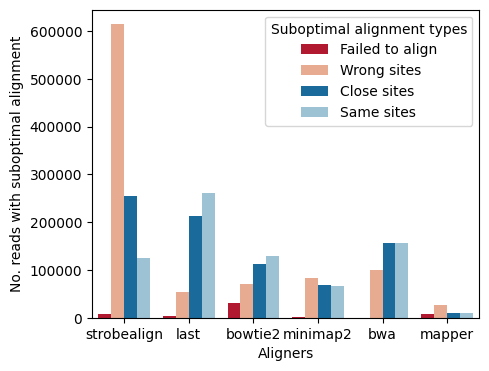

In [126]:
palette_set = {
    'Failed to align':'#ca0020',
    'Wrong sites':'#f4a582',
    'Close sites':'#0571b0',
    'Same sites':'#92c5de',

}
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(5, 4))
legend_order = [ 'Failed to align', 'Wrong sites',
                'Close sites', 
                'Same sites']

sns.barplot(data = score2subtoolall,
            x='tool',y='count',hue='tag1',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('Aligners') 
axs.set_ylabel('No. reads with suboptimal alignment')
plt.sca(axs)
plt.legend(title = 'Suboptimal alignment types',bbox_to_anchor=(1.0, 1.0))
plt.savefig('%s_bowtie_allwrongalignment2.pdf'%(samplename),bbox_inches='tight')


In [127]:
score2subbowtie = score2sub[score2sub['%s_x'%('minimap')]==1000]
score2subbowtie.head()
#list(score2subbowtie[score2subbowtie['tag2']=='Others']['readID'])[:10]

,readID,read,mapper_x,bwa_x,bowtie_x,minimap_x,last_x,mapper.kmer16,mapper.nogapped,strobealign_x,...,tagstrobealign,tag2,minpenalty,sumtools,bowtie_y,bwa_y,minimap_y,mapper_y,strobealign_y,last_y
7771,DRR163384.1532285GCCCCTCCTGCTCTATCCATGGCGCCCGC...,GCCCCTCCTGCTCTATCCATGGCGCCCGCGGCTCCTTCCTCGGACT...,47,48,1000,1000,54,47,47,1000,...,alignmentmissed,RightSoftRightInWrongSoft,47,3149,,,,,,
12769,DRR163384.1310345CGCACGTGCCCTCCAGGTAGGCTCTCAAC...,CGCACGTGCCCTCCAGGTAGGCTCTCAACTGCTCCGCCACATGGGC...,54,54,54,1000,58,54,1000,402,...,sameCHRclosePOS,RightSoftWrongSoft,54,1622,,,no gapped k-mer,,no gapped k-mer,no gapped k-mer
12935,DRR163384.1313302CTGCTCTATCCATGGCGCCCGCGGCTCCT...,CTGCTCTATCCATGGCGCCCGCGGCTCCTTCCTCGGACTCGTGGCG...,48,48,1000,1000,48,48,48,1000,...,alignmentmissed,RightSoftWrongSoft,48,3144,,,,,,
13142,DRR163384.1618927CACGCACGTGCCCTCCAGGTAGGCTCTCA...,CACGCACGTGCCCTCCAGGTAGGCTCTCAACTGCTCCGCCACATGG...,54,54,54,1000,58,54,1000,396,...,sameCHRclosePOS,RightSoftWrongSoft,54,1616,,,no gapped k-mer,,no gapped k-mer,no gapped k-mer
14411,DRR163384.1521332CGCACGTGCCCTCCAGGTAGGCTCTCAAC...,CGCACGTGCCCTCCAGGTAGGCTCTCAACTGCTCCGCCACATGGGC...,54,54,54,1000,58,54,1000,402,...,sameCHRclosePOS,RightSoftWrongSoft,54,1622,,,no gapped k-mer,,no gapped k-mer,no gapped k-mer


In [128]:
score2subbowtie[score2subbowtie['readID']=='ao_BiBi_SL-NXA:H2FHHBGX2161121:H2FHHBGX2:1:11205:16081:6690ACATAACGCAACGGGATGCCAAAACTTGGAGATACGACCGTTTTCGGTGGGAAAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGTGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG']

,readID,read,mapper_x,bwa_x,bowtie_x,minimap_x,last_x,mapper.kmer16,mapper.nogapped,strobealign_x,...,tagstrobealign,tag2,minpenalty,sumtools,bowtie_y,bwa_y,minimap_y,mapper_y,strobealign_y,last_y


In [129]:
# no alignment + wrong sites only
score2subtoolall = pd.DataFrame()
score2subtoolall2 = pd.DataFrame(
{
        'tool':['strobealign','last','bowtie','minimap','bwa','mapper'],
        'count':0
    }
)
for tool,tooltag in zip(['strobealign','last','bowtie','minimap','bwa','mapper'],['tagstrobealign','taglast',
                                                                                  'tagbowtie','tagminimap','tagbwa','tagmapper']):
    score2subbowtie = score2sub[score2sub['%s_x'%(tool)]>score2sub['minpenalty']]
    score2subbowtie['tag1'] = score2subbowtie[tooltag].replace('alignmentmissed',
                                                               'Failed to align').replace('diffCHR',
                                                               'Wrong sites').replace('sameCHRdiffPOS',
                                                               'Wrong sites').replace('sameCHRclosePOS',
                                                               'Close sites').replace('sameCHRsamePOS',
                                                               'Same sites')
    score2subbowtie = score2subbowtie[score2subbowtie['tag1'].isin(['Failed to align','Wrong sites'])]
    print(score2subbowtie.shape)
    score2subtoolall2.loc[score2subtoolall2['tool']==tool,'count']= score2subbowtie.shape[0]
    score2subtoolall2.loc[score2subtoolall2['tool']==tool,'tool']= tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
#     score2subbowtie = score2sub[score2sub['%s_x'%(tool)]==1000]
    score2subbowtie.loc[score2subbowtie['%s_y'%(tool)]!='','tag2']=score2subbowtie.loc[score2subbowtie['%s_y'%(tool)]!='','%s_y'%(tool)]
    score2subbowtie['tag2'] = score2subbowtie['tag2'].replace('WrongSoftWrongIn','WrongSoft').replace(
        'RightSoftRightIn','RightIn').replace(
        'RightInWrongSoft','Indels missing').replace(
        'RightSoft','Soft clips missing').replace(
        'WrongSoft','Misassigned soft clips').replace(
        'RightSoftWrongIn','Soft clips missing').replace(
        'RightSoftWrongSoft','Misassigned soft clips').replace(
        'RightInWrongIn','Indels missing').replace(
        'RightIn','Indels missing').replace(
        'RightInWrongSoftWrongIn','Indels missing').replace(
        'RightSoftRightInWrongIn','Indels missing').replace(
        'RightSoftWrongSoftWrongIn','Soft clips missing').replace(
        'RightSoftRightInWrongSoftWrongIn','Indels missing').replace(
        'RightSoftRightInWrongSoft','Indels missing').replace(
        'WrongIn','Others')
    score2subtool = pd.DataFrame(score2subbowtie.groupby('tag2')['tag2'].count())
    score2subtool.columns=['count']
    score2subtool.reset_index(inplace=True)
    score2subtool['tool']=tool.replace('bowtie','bowtie2').replace('minimap','minimap2')
    score2subtoolall = score2subtoolall.append(score2subtool)
score2subtoolall.sort_values('count').to_csv("SNP_model_penalty/%s_reason2.txt"%(samplename),sep='\t',index = False)


score2subtoolall.sort_values('count')


(621835, 28)
(57111, 28)
(101120, 28)
(83087, 28)
(100634, 28)
(34465, 28)


,tag2,count,tool
2,Soft clips missing,937,bowtie2
2,Soft clips missing,1211,mapper
4,no gapped k-mer,1543,last
2,Soft clips missing,2121,strobealign
4,no gapped k-mer,7325,minimap2
0,Indels missing,8999,last
4,no gapped k-mer,9060,bwa
2,Soft clips missing,9529,minimap2
0,Indels missing,9576,minimap2
0,Indels missing,9778,mapper


In [130]:
score2subtoolall[score2subtoolall['tag2'].isin([
    'k-mer suboptimal', 'k-mer too long',
       'k-mer too short'
])].sort_values(['tool']).groupby('tool')['count'].sum()

tool
bowtie2        13538
bwa            20415
last           18747
minimap2       14412
strobealign    33446
Name: count, dtype: int64

In [131]:
score2subtoolall2.tail()


,tool,count
1,last,57111
2,bowtie2,101120
3,minimap2,83087
4,bwa,100634
5,mapper,34465


In [132]:
score2subtoolall[score2subtoolall['tag2'].isin([
    'Indels missing', 'Misassigned soft clips',
       'Soft clips missing'
])].sort_values(['tool']).groupby('tool')['count'].sum()

tool
bowtie2         68387
bwa             71159
last            36821
mapper          34465
minimap2        61350
strobealign    553195
Name: count, dtype: int64

In [133]:

score2subtoolall[score2subtoolall['tag2'].isin([
    '>=5 SNPs'
])].sort_values(['tool']).groupby('tool')['count'].sum()

Series([], Name: count, dtype: int64)

In [134]:
# score2sub[score2sub['readID']=='700536:HVG5YBCXX161014:HVG5YBCXX:2:1206:15399:91210ATCCTACAGCTTCTAAAACGTTATATGGAAAAGCATTGAATGACCATCTGACTAAAATTATCACTCAAAAATTCATTGCACAAACTCCGTATTTGGTATTG']

In [135]:
tagtocheck = 'k-mer too long'
list1 = score2sub[score2sub['%s_y'%('bowtie')]==tagtocheck][score2sub['%s_x'%('bowtie')]==1000]
list1 = list1[list1['%s_y'%('bwa')]==tagtocheck][list1['%s_x'%('bwa')]==1000]
list1 = list1[list1['%s_y'%('minimap')]==tagtocheck][list1['%s_x'%('minimap')]==1000]
list1 = list1[list1['%s_y'%('mapper')]==''][list1['%s_x'%('mapper')]!=1000]
badreadID = list(list1['readID'])
# badreadID = list(score2subbowtie[score2subbowtie['tag2']=='Soft clips missing']['readID'])
print(len(badreadID))
badreadID[:20]

0


[]

In [136]:
score2substrobealign = score2sub[score2sub['%s_x'%('strobealign')]>score2sub['minpenalty']]
score2substrobealign.loc[score2substrobealign['tag2']=='Others',['mapper_x','strobealign_x']].head()


,mapper_x,strobealign_x


In [137]:
list(score2substrobealign[score2substrobealign['tag2']=='Others'].head()['readID'])

[]

In [138]:
# read_check = list(set([':'.join(x.split(':')[:-1]) + ':' + x.split(':')[-1].split('A')[0].split('T')[0].split('G')[0].split('C')[0] for x in badreadID[:20]]))
# print(read_check)
# fastq_folder = '/media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test/'
# script_folder = '/home/caozhichongchong/WS/WS2/scripts/snp_curate/SNP_model_penalty/compare_long/'
# i = 0
# cmds = ''
# cmds += ('conda activate bt\n')
# for readID in read_check:
#     tempname = '%s/trial_%s'%(script_folder,i)
#     os.system('grep -A 3 "%s" %s/am0230_all.fastq | sed "/^--$/d" > %s_all.fastq'%(readID,fastq_folder,tempname))
#     cmds += ('java -Xms25g -Xmx25g -jar /home/caozhichongchong/WS/WS2/scripts/snp_curate/mapper-1.1.0-alpha106.jar -vv --no-infer-ancestors --additional-extend-insertion-penalty 0 --max-penalty 0.60 --snp-penalty 6 --new-indel-penalty 5 --extend-indel-penalty 3 --ambiguity-penalty 1 --num-threads 30 --reference /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta --queries %s_all.fastq  --out-sam %s.mapper.sam | tee %s.mapper.log \n'%(
#    tempname,tempname,tempname ))
#     cmds += ('java -Xms25g -Xmx25g -jar /home/caozhichongchong/WS/WS2/scripts/snp_curate/mapper-1.1.0-alpha106-experimental-kmers.jar --block-length 12 -vv --no-infer-ancestors --additional-extend-insertion-penalty 0 --max-penalty 0.60 --snp-penalty 6 --new-indel-penalty 5 --extend-indel-penalty 3 --ambiguity-penalty 1 --num-threads 30 --reference /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta --queries %s_all.fastq  --out-sam %s.mapper.12mer.sam | tee %s.mapper.12mer.log \n'%(
#    tempname,tempname,tempname ))
#     cmds += ('java -Xms25g -Xmx25g -jar /home/caozhichongchong/WS/WS2/scripts/snp_curate/mapper-1.1.0-alpha106-experimental-kmers.jar --block-length 18 -vv --no-infer-ancestors --additional-extend-insertion-penalty 0 --max-penalty 0.60 --snp-penalty 6 --new-indel-penalty 5 --extend-indel-penalty 3 --ambiguity-penalty 1 --num-threads 30 --reference /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta --queries %s_all.fastq  --out-sam %s.mapper.18mer.sam | tee %s.mapper.18mer.log \n'%(
#    tempname,tempname,tempname ))
#     cmds += ('java -Xms25g -Xmx25g -jar /home/caozhichongchong/WS/WS2/scripts/snp_curate/mapper-1.1.0-alpha106-experimental-kmers.jar --block-length 24 -vv --no-infer-ancestors --additional-extend-insertion-penalty 0 --max-penalty 0.60 --snp-penalty 6 --new-indel-penalty 5 --extend-indel-penalty 3 --ambiguity-penalty 1 --num-threads 30 --reference /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta --queries %s_all.fastq  --out-sam %s.mapper.24mer.sam | tee %s.mapper.24mer.log \n'%(
#    tempname,tempname,tempname ))
#     cmds += ('minimap2 -ax sr -t 30 -B 4 -O 3 -E 3 -A 2 --score-N 1 /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta.mmi %s_all.fastq > %s.minimap.sam \n'%(
#    tempname,tempname ))
#     cmds += ('bwa mem -t 30 -B 4 -O 3 -E 3 -A 2 /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta %s_all.fastq > %s.bwa.sam \n'%(
#    tempname,tempname ))
#     cmds += ('bowtie2 --threads 30 --mp 6,6 --rfg 5,3 --rdg 5,3 --np 1 --ignore-quals -x /media/caozhichongchong/0fca1a13-dd3f-43f5-9b94-876be77c58da/WS1/genome/donor_species/SNP_curate/test_data/penalty_test//am0230.fasta -U %s_all.fastq -S %s.bowtie.sam \n'%(
#    tempname,tempname ))
#     i += 1
# f1 = open('%s/script.sh'%(script_folder),'w')
# f1.write('#!/bin/bash\nsource ~/.bashrc\n')
# f1.write(cmds)
# f1.close()

In [139]:
# score2subbowtie.tail(20)


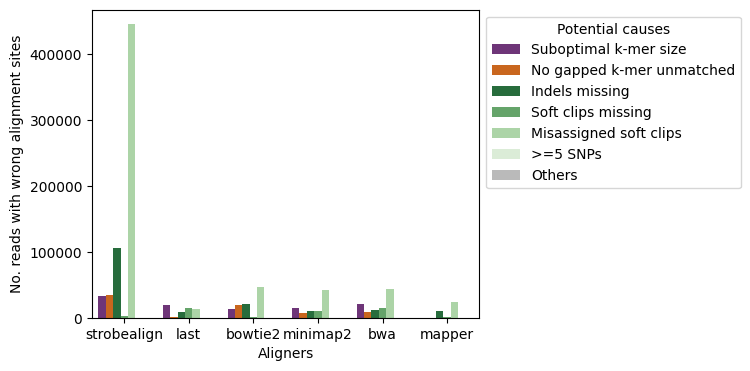

In [140]:
score2subtoolall['tag2'] = [
    x.replace('k-mer too short','Short k-mers unmatched').replace(
        'k-mer too long','Long k-mers unmatched').replace(
        'k-mer suboptimal','Suboptimal k-mer size').replace(
        'no gapped k-mer','No gapped k-mer unmatched')  for x in score2subtoolall['tag2'] 
]
palette_set = {
    'Suboptimal k-mer size':'#762a83',
    'No gapped k-mer unmatched':'#e66101',
    'Soft clips missing':'#5aae61',
    'Indels missing':'#1b7837',
    'Misassigned soft clips':'#a6dba0',
    '>=5 SNPs':'#d9f0d3',
    'Others':'#bababa',

}
legend_order = [ 'Suboptimal k-mer size', 
                'No gapped k-mer unmatched',
                'Indels missing', 
                'Soft clips missing','Misassigned soft clips', '>=5 SNPs',
                'Others']
if 'am20' in samplename:
    score2subtoolall['tag2'] = [
        x.replace('k-mer too short','Short k-mers unmatched').replace(
            'k-mer too long','Long k-mers unmatched').replace(
            'k-mer suboptimal','Short and long k-mers unmatched').replace(
            'no gapped k-mer','No gapped k-mer unmatched')  for x in score2subtoolall['tag2'] 
    ]
    palette_set = {
        'Short k-mers unmatched':'#c2a5cf',
        'Long k-mers unmatched':'#762a83',
         'Short and long k-mers unmatched':'#9970ab',
        'No gapped k-mer unmatched':'#e66101',
        'Soft clips missing':'#5aae61',
        'Indels missing':'#1b7837',
        'Misassigned soft clips':'#a6dba0',
        '>=5 SNPs':'#d9f0d3',
        'Others':'#bababa',
    
    }
    legend_order = [ 'Short k-mers unmatched','Short and long k-mers unmatched', 'Long k-mers unmatched', 
                    'No gapped k-mer unmatched',
                    'Indels missing', 
                    'Soft clips missing','Misassigned soft clips', '>=5 SNPs',
                    'Others']

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(5, 4))
sns.barplot(data = score2subtoolall,
            x='tool',y='count',hue='tag2',palette=palette_set,hue_order = legend_order)
axs.set_xlabel('Aligners') 
axs.set_ylabel('No. reads with wrong alignment sites')
plt.sca(axs)
plt.legend(title = 'Potential causes', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('%s_bowtie_noalignment.pdf'%(samplename),bbox_inches='tight')


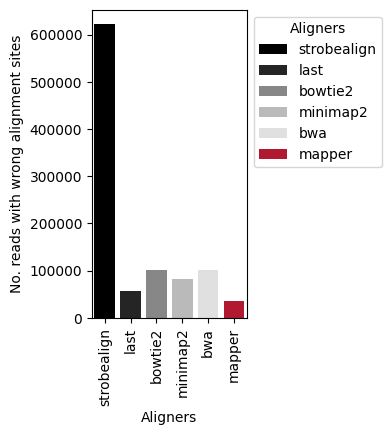

In [141]:
palette_set = {
    'bowtie2':'#878787','bowtie2N1':'#525252','minimap2':'#bababa','bwa':'#e0e0e0','mapper':'#ca0020','strobealign':'#000000',
    'last':'#252525',
     'mapper no gapped-xmer':'#f4a582',
    'mapper 12mer':'#c6dbef',
    'mapper 14mer':'#9ecae1',
    'mapper 16mer':'#6baed6',
     'mapper 18mer':'#4292c6',
    'mapper 20mer':'#2171b5',
    'mapper 22mer':'#08519c',
    'mapper 24mer':'#08306b',
        'bowtie2 all':'#2166ac','minimap2 all':'#67a9cf','bwa all':'#d1e5f0'
    }

legend_order = ['strobealign', 'last','bowtie2', 'minimap2',
                'bwa', 
                'mapper']

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2,4))
sns.barplot(data = score2subtoolall2,
            x='tool',y='count',hue='tool',palette=palette_set,hue_order = legend_order,dodge=False)
axs.set_xlabel('Aligners') 
axs.set_ylabel('No. reads with wrong alignment sites')
plt.sca(axs)
plt.xticks(rotation=90)

plt.legend(title = 'Aligners', bbox_to_anchor=(1.0, 1.0))   
plt.savefig('%s_bowtie_noalignmentall.pdf'%(samplename),bbox_inches='tight')


In [142]:
score2subtoolall2

,tool,count
0,strobealign,621835
1,last,57111
2,bowtie2,101120
3,minimap2,83087
4,bwa,100634
5,mapper,34465


In [109]:
## end

In [ ]:
# list(score2sub[score2sub['bowtie']==1000]['readID'])[0]

In [62]:
score2sub = score2[score2['type'].isin(['alignmentmissed'])]
score2sub[score2sub['reason']=='De']
score2sub.head()

,readID,read,readlen,bowtie,bwa,minimap,mapper,mapper (no ancestor),mapper (15mer),mapper (20mer),mapper (25mer),limit,minpenalty,fold,type,reason
40,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,150,90.0,146.0,146.0,86.0,86.0,86.0,86.0,86.0,90.0,86.0,0.955556,alignmentmissed,InDeSoft
100,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11102:7358:...,TTTCTGAAACGTTCCGTGTGGTTTATTGGCAAACTATAAAAAATAA...,150,96.0,134.0,134.0,86.0,86.0,86.0,86.0,86.0,90.0,86.0,0.955556,alignmentmissed,InDeSoft
312,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:18450...,GTGTAACAGAATCCGCATGGAGGCGGACTGTTACACAGTTCAAGCC...,120,74.0,110.0,110.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,1.000000,alignmentmissed,InDeSoft
324,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:18450...,GTACAGACAGGCAACAAGTCCGAGAGTGTAACATCCTATTGCAAGA...,120,74.0,110.0,110.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,1.000000,alignmentmissed,InDeSoft
410,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11201:4794:...,GCTAAATATCGTAGAGATAAACCTAGGTAAAAAGATCTGAACTCTT...,150,93.0,134.0,134.0,88.0,88.0,88.0,88.0,88.0,90.0,88.0,0.977778,alignmentmissed,InDeSoft


In [63]:
penaltysub = penalty[penalty['readID']==list(score2sub['readID'])[0]]
penaltysub

,readID,read,score,CIGAR,ref,CHR,POS,tool
1056,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,1000,*,NaN,NaN,NaN,0
1057,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,146,36S114M,ATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAA...,scaffold2|size344066,136412.0,1
1058,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,146,36S114M,ATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAA...,scaffold2|size344066,136412.0,2
1059,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,86,11M1I3M1D2M3I4M1I2M2D6M1D2M1I114M,TGCCGGATGGTTCCTTGTTAAGGAATTCGGATCTGATATTACGTAT...,scaffold2|size344066,136378.0,3
1060,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,86,11M1I3M1D2M3I4M1I2M2D6M1D2M1I114M,TGCCGGATGGTTCCTTGTTAAGGAATTCGGATCTGATATTACGTAT...,scaffold2|size344066,136378.0,4
1061,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,86,11M1I3M1D2M3I4M1I2M2D6M1D2M1I114M,TGCCGGATGGTTCCTTGTTAAGGAATTCGGATCTGATATTACGTAT...,scaffold2|size344066,136378.0,5
1062,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,86,11M1I3M1D2M3I4M1I2M2D6M1D2M1I114M,TGCCGGATGGTTCCTTGTTAAGGAATTCGGATCTGATATTACGTAT...,scaffold2|size344066,136378.0,6
1063,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16850...,TCCCTGATATTCTCCTTCGCGTTATAGGAATACGTAATCTGATATT...,86,11M1I3M1D2M3I4M1I2M2D6M1D2M1I114M,TGCCGGATGGTTCCTTGTTAAGGAATTCGGATCTGATATTACGTAT...,scaffold2|size344066,136378.0,7


In [40]:
list(penaltysub['read'])[0]

'GTATAATAATAAATTAAAAGTGGGCGTTGACGGATTCGAACCGCCGACCCTCTGCTTGTAAGGCAGATGCTCTGAACCAGCTGAGCTAAACGCCCGAAAATCTTTCGGTGAAATAATAAATT'

In [ ]:
         Query: GTATAATAATAAATTAAAAGTGGGCGTTGACGGATTCGAACCGCCGACCCTCTGCTTGTAAGGCAGATGCTCTGAACCAGCTGAGCTAAACGCCCGAAAATCTTTCGGTGAAATAATAAATT
 Difference   :  !!!   !!      !!!!                                                                            ~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Aligned ref  : G---AAT--TAAATT--TCGTGGGCGTTGACGGATTCGAACCGCCGACCCTCTGCTTGTAAGGCAGATGCTCTGAACCAGCTGAGCTAAACGCCCNNNNNNNNNNNNNNNNNNNNNNNNNNN(scaffold11|size312271, offset 128324)
         Query: GTATAATAATAAATTAAAAGTGGGCGTTGACGGATTCGAACCGCCGACCCTCTGCTTGTAAGGCAGATGCTCTGAACCAGCTGAGCTAAACGCCCG
 Aligned ref  : GAATTAAATTTCGTGGGCGTTGACGGATTCGAACCGCCGACCCTCTGCTTGTAAGGCAGATGCTCTGAACCAGCTGAGCTAAACGCCC


In [ ]:
 Aligned query: TCCCTGATATTCTCC-TTCGCGTTATAG--GAATAC-GTAATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAAGTGAATTTCCAAGGAGAGGGCTTCTTCGATGTCTCGAAGAACAAGATACCGTTCGTGATCAAGATGAA
 Difference   :  !  !   !! !   !  !!!    !  !!    ! ! !!                                                                                                                  
 Aligned ref  : TGCCGGATGGT-TCCGTT---GTTA-AGCTGAATTCTGG-ATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAAGTGAATTTCCAAGGAGAGGGCTTCTTCGATGTCTCGAAGAACAAGATACCGTTCGTGATCAAGATGAA
Aligned query: TGCCGGATGGTTCCGTTCGCGTTAAG--GAATTCTGGATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAAGTGAATTTCCAAGGAGAGGGCTTCTTCGATGTCTCGAAGAACAAGATACCGTTCGTGATCAAGATGAA
 Difference   :                  !!!      !!                                                                                                                           
 Aligned ref  : TGCCGGATGGTTCCGTT---GTTAAGCTGAATTCTGGATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAAGTGAATTTCCAAGGAGAGGGCTTCTTCGATGTCTCGAAGAACAAGATACCGTTCGTGATCAAGATGAA(scaffold2|size344066, offset 136377)

query: TGCCGGATGGTTCCGTTCGCGTTAAGGAATTCTGGATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAAGTGAATTTCCAAGGAGAGGGCTTCTTCGATGTCTCGAAGAACAAGATACCGTTCGTGATCAAGATGAA
ref  : TGCCGGATGGTTCCGTTGTTAAGCTGAATTCTGGATCTGATATTACGTATTCCTATAACGCGAAGGAGAATATCAGGGAAGTGAATTTCCAAGGAGAGGGCTTCTTCGATGTCTCGAAGAACAAGATACCGTTCGTGATCAAGATGAA


In [116]:
# check kmer
score2sub = score2[score2['type'].isin(['alignmentmissed'])]
penaltykmer2 = pd.DataFrame(
    {'readID': score2sub['readID'],
    'bowtie' : 0,
    'bwa' : 0,
    'minimap' : 0,
    'mapper' : 0}
)
tool_match = {
    0:'bowtie',
    1:'bwa',
    2:'minimap',
    3:'mapper',
    5:'mapper (15mer)',
    6:'mapper (20mer)',
    7:'mapper (24mer)'
}
kmer_match = {
    5:15,
    6:20,
    7:25,
}
for i in score2sub.index:
    readID = score2sub.loc[i,'readID']
    penaltysub = penalty[penalty['readID']==readID]
    tool_alignmentmissing = list(penaltysub.loc[penaltysub['score']==1000,'tool'])
    kmer_min = 30
    if len(tool_alignmentmissing) > 0:
        for tool in [7,6,5]:
            if tool in tool_alignmentmissing:
                kmer_min = min(kmer_min,kmer_match[tool])
        for tool in [0,1,2,3]:
                if tool in tool_alignmentmissing:
                    penaltykmer2.loc[penaltykmer2['readID']==readID,tool_match[tool]] = kmer_min
    else:
        minscore = min(penaltysub['score'])
        tool_notminscore = list(penaltysub.loc[penaltysub['score']>minscore,'tool'])
        for tool in [5,6,7]:
            if tool in tool_notminscore:
                kmer_min = min(kmer_min,kmer_match[tool])
        for tool in [0,1,2,3]:
                if tool in tool_notminscore:
                    POStool = list(penaltysub.loc[penaltysub['tool']==tool,'POS'])[0]
                    for toolkmer in [7,6,5]:
                        if toolkmer in tool_notminscore:
                            POSkmer = list(penaltysub.loc[penaltysub['tool']==toolkmer,'POS'])[0]
                            if POSkmer == POStool:
                                penaltykmer2.loc[penaltykmer2['readID']==readID,
                                                tool_match[tool]] = kmer_match[toolkmer]
                                break

penaltykmer2['sum'] = penaltykmer2['bowtie'] + penaltykmer2['bwa'] + penaltykmer2['minimap'] + penaltykmer2['mapper']
penaltykmer2 = penaltykmer2[penaltykmer2['sum']>0]
penaltykmer2.head()


,readID,bowtie,bwa,minimap,mapper,sum
4,ERR3278849.100241AACAGTTTTCCCCCAACCCCTGCTCTCTT...,30,0,0,0,30
20,ERR3278849.1000375CGCTTTTGAAAAAATAACAGGTATAGGC...,25,0,0,0,25
23,ERR3278849.1000641GTCCGACGGTCCCGCTTCTCGCCTCTCT...,30,0,0,0,30
58,ERR3278849.1001530CCCTCCTCACCCTGGCTGCGGGGAGACA...,20,0,0,0,20
62,ERR3278849.1000497GAGCGATCGACGCCCCCGCGCCCCGGCT...,20,0,20,0,40


In [117]:
penaltykmer['type'] = 'sameCHRdiffPOS'
print(penaltykmer.shape)
penaltykmer2['type']='alignmentmissed'
penaltykmer = penaltykmer.append(penaltykmer2)
print(penaltykmer.shape)

(1883, 7)
(12926, 7)


In [124]:
print(score2sub.shape)

(11043, 16)


In [128]:
print(penaltykmer2[penaltykmer2['minimap']>0].shape,
     penaltykmer2[penaltykmer2['minimap']>0][penaltykmer2['minimap']<30].shape)

(1162, 7) (1058, 7)


In [129]:
print(penaltykmer2[penaltykmer2['bowtie']>0].shape,
     penaltykmer2[penaltykmer2['bowtie']>0][penaltykmer2['bowtie']<30].shape)
# the rest is mostly soft clipping

(10518, 7) (4852, 7)


In [130]:
print(penaltykmer2[penaltykmer2['bwa']>0].shape,
     penaltykmer2[penaltykmer2['bwa']>0][penaltykmer2['bwa']<30].shape)

(71, 7) (71, 7)


(11043, 7)


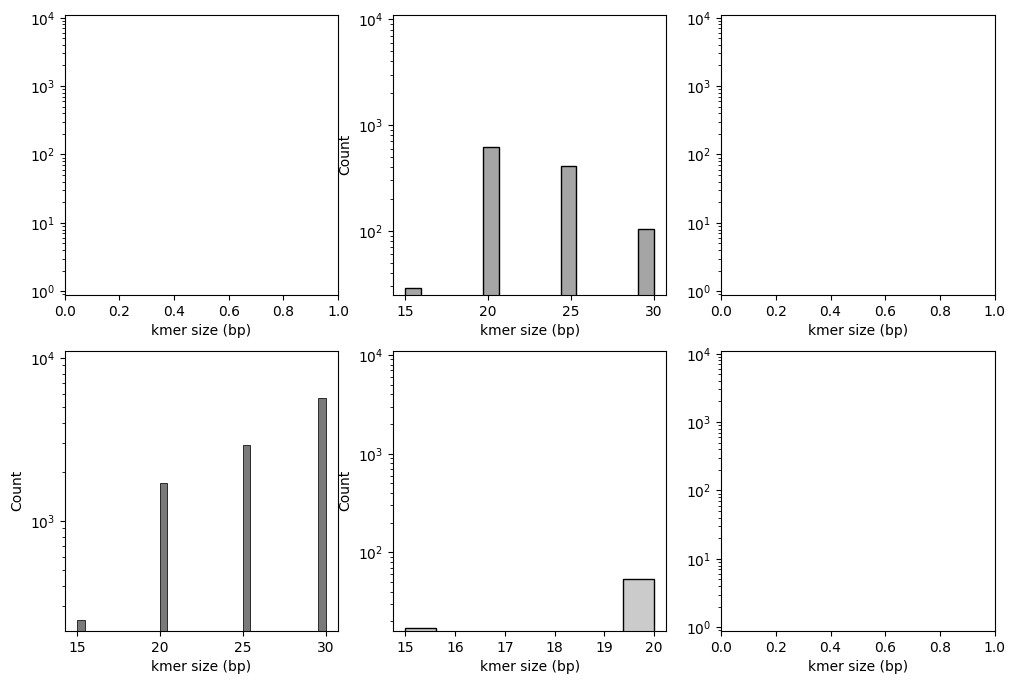

In [123]:
tag = 'kmer'
print(penaltykmer2.shape)
max_y = penaltykmer2.shape[0]
fig, axs = plt.subplots(nrows=2,ncols = 3,figsize=(12, 8))
sns.histplot(data = penaltykmer2[penaltykmer2['mapper']>0],
             x = 'mapper',ax = axs[0,0],color = '#b2182b')
sns.histplot(data = penaltykmer2[penaltykmer2['minimap']>0],
             x = 'minimap',ax = axs[0,1],color = '#878787')
sns.histplot(data = penaltykmer2[penaltykmer2['bwa']>0],
             x = 'bwa',ax = axs[1,1],color = '#bababa')
sns.histplot(data = penaltykmer2[penaltykmer2['bowtie']>0],
             x = 'bowtie',ax = axs[1,0],color = '#4d4d4d')
# sns.histplot(data = penaltykmer2[penaltykmer2['mapper']>0],
#              x = 'mapper',ax = axs[1,2],color = '#0571b0')
# sns.histplot(data = penaltykmer2[penaltykmer2['mapper']>0],
#              x = 'mapper',ax = axs[0,2],color = '#542788')
axs[0,0].set(yscale="log")
axs[0,0].set_ylim([0,max_y])
axs[0,1].set(yscale="log")
axs[0,1].set_ylim([0,max_y])
axs[0,2].set(yscale="log")
axs[0,2].set_ylim([0,max_y])
axs[1,0].set(yscale="log")
axs[1,0].set_ylim([0,max_y])
axs[1,1].set(yscale="log")
axs[1,1].set_ylim([0,max_y])
axs[1,2].set(yscale="log")
axs[1,2].set_ylim([0,max_y])
axs[0,0].set_xlabel('%s size (bp)'%(tag)) 
axs[0,1].set_xlabel('%s size (bp)'%(tag)) 
axs[0,2].set_xlabel('%s size (bp)'%(tag)) 

axs[1,0].set_xlabel('%s size (bp)'%(tag)) 
axs[1,1].set_xlabel('%s size (bp)'%(tag)) 
axs[1,2].set_xlabel('%s size (bp)'%(tag)) 

plt.savefig('wrongalignment_%s1.pdf'%(tag))

In [75]:
# check S distance
import re
def soft_lengthcheck(CIGAR):
    CIGARlenset = re.split('S|D|M|I|N|H|P', CIGAR)[:-1]
    beforesoft = 0
    softlength = 0
    i = 0
    for CIGARlen in CIGARlenset:
        i += len(CIGARlen)
        CIGARtype = CIGAR[i]
        i += 1
        if CIGARtype not in ['S']:
            # not soft
            if softlength == 0:
                beforesoft += int(CIGARlen)
        else:
            softlength = int(CIGARlen)
    return [softlength,beforesoft]

score2sub = score2[score2['reason'].isin(['Soft','InDeSoft','InSoft','DeSoft'])]

penaltysoft = pd.DataFrame(
    {'readID': score2sub['readID'],
    'softlength' : -1,
    'beforesoft': -1,
    'bowtie' : 0,
    'bwa' : 0,
    'minimap' : 0,
    'mapper' : 0}
)
tool_match = {
    0:'bowtie',
    1:'bwa',
    2:'minimap',
    3:'mapper'
}
for i in score2sub.index:
    readID = score2sub.loc[i,'readID']
    penaltysub = penalty[penalty['readID']==readID]
    minscore = min(penaltysub['score'])
    minCIGAR = list(penaltysub.loc[penaltysub['score']==minscore,'CIGAR'])[0]
    if 'S' in minCIGAR:
        softlength,beforesoft = soft_lengthcheck(minCIGAR)
        penaltysoft.loc[penaltysoft['readID']==readID,'softlength'] = softlength
        penaltysoft.loc[penaltysoft['readID']==readID,'beforesoft'] = beforesoft
        for tool in [0,1,2,3]:
            toolscore = list(penaltysub.loc[penaltysub['tool']==tool,'score'])[0]
            if toolscore <= minscore:
                penaltysoft.loc[penaltysoft['readID']==readID,tool_match[tool]] = 1
penaltysoft.head()

,readID,softlength,beforesoft,bowtie,bwa,minimap,mapper
7,ERR3278849.1003496TGCGGACGGACGCGGCCGTCTTCGACCC...,-1,-1,0,0,0,0
8,ERR3278849.100389GCCCAGGGCCGCCAGCAGGCAGGACAGCC...,-1,-1,0,0,0,0
13,ERR3278849.1004584ACGCCGTGGTCCGACCACGGCGTACAGG...,-1,-1,0,0,0,0
21,ERR3278849.1005280CCCCCGCCCATCAACCGCCTGTTCGTCC...,-1,-1,0,0,0,0
25,ERR3278849.1001709CCGAAAGCCATGGACACCAAGCCCAAAA...,-1,-1,0,0,0,0


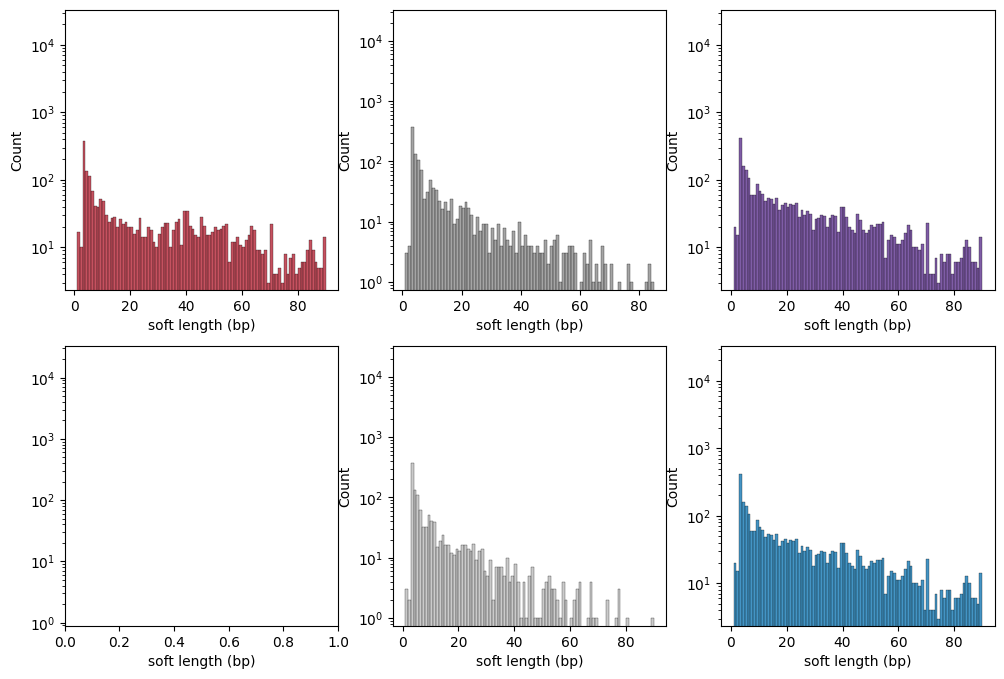

In [76]:
tag = 'soft'
max_y = penaltysoft.shape[0]
fig, axs = plt.subplots(nrows=2,ncols = 3,figsize=(12, 8))
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['mapper']==1],binwidth=1,
             x = 'softlength',ax = axs[0,0],color = '#b2182b')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['minimap']==1],binwidth=1,
             x = 'softlength',ax = axs[0,1],color = '#878787')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['bwa']==1],binwidth=1,
             x = 'softlength',ax = axs[1,1],color = '#bababa')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['bowtie']==1],binwidth=1,
             x = 'softlength',ax = axs[1,0],color = '#4d4d4d')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0],binwidth=1,
             x = 'softlength',ax = axs[1,2],color = '#0571b0')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0],binwidth=1,
             x = 'softlength',ax = axs[0,2],color = '#542788')
axs[0,0].set(yscale="log")
axs[0,0].set_ylim([0,max_y])
axs[0,1].set(yscale="log")
axs[0,1].set_ylim([0,max_y])
axs[0,2].set(yscale="log")
axs[0,2].set_ylim([0,max_y])
axs[1,0].set(yscale="log")
axs[1,0].set_ylim([0,max_y])
axs[1,1].set(yscale="log")
axs[1,1].set_ylim([0,max_y])
axs[1,2].set(yscale="log")
axs[1,2].set_ylim([0,max_y])
axs[0,0].set_xlabel('%s length (bp)'%(tag)) 
axs[0,1].set_xlabel('%s length (bp)'%(tag)) 
axs[0,2].set_xlabel('%s length (bp)'%(tag)) 

axs[1,0].set_xlabel('%s length (bp)'%(tag)) 
axs[1,1].set_xlabel('%s length (bp)'%(tag)) 
axs[1,2].set_xlabel('%s length (bp)'%(tag)) 

plt.savefig('wrongalignment_%s1.pdf'%(tag))

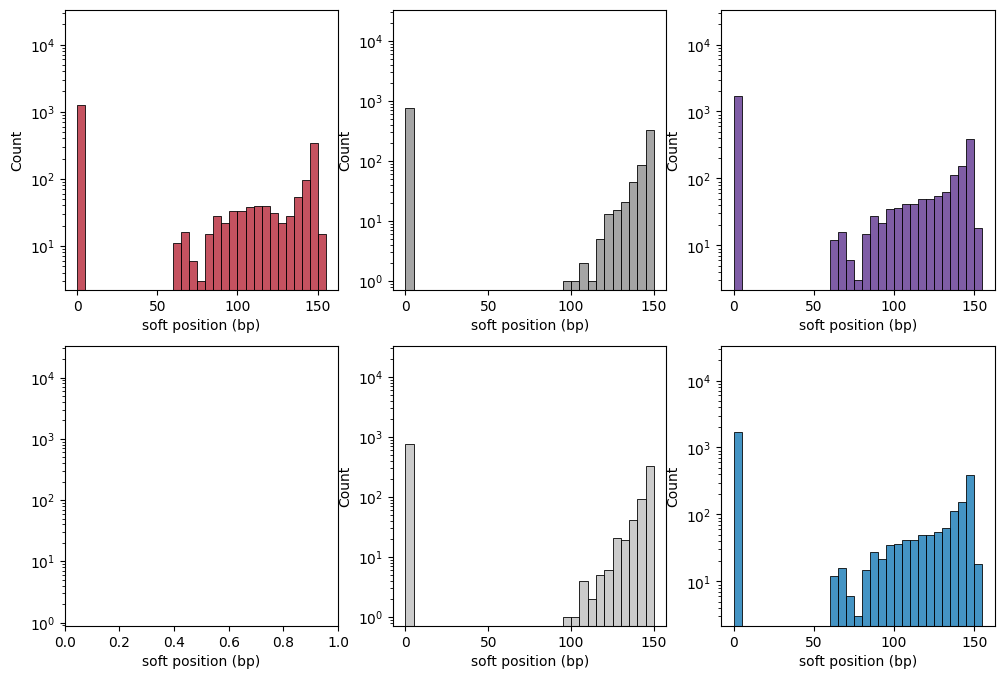

In [77]:
fig, axs = plt.subplots(nrows=2,ncols = 3,figsize=(12, 8))
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['mapper']==1],binwidth=5,
             x = 'beforesoft',ax = axs[0,0],color = '#b2182b')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['minimap']==1],binwidth=5,
             x = 'beforesoft',ax = axs[0,1],color = '#878787')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['bwa']==1],binwidth=5,
             x = 'beforesoft',ax = axs[1,1],color = '#bababa')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0][penaltysoft['bowtie']==1],binwidth=5,
             x = 'beforesoft',ax = axs[1,0],color = '#4d4d4d')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0],binwidth=5,
             x = 'beforesoft',ax = axs[1,2],color = '#0571b0')
sns.histplot(data = penaltysoft[penaltysoft['softlength']>0],binwidth=5,
             x = 'beforesoft',ax = axs[0,2],color = '#542788')
axs[0,0].set(yscale="log")
axs[0,0].set_ylim([0,max_y])
axs[0,1].set(yscale="log")
axs[0,1].set_ylim([0,max_y])
axs[0,2].set(yscale="log")
axs[0,2].set_ylim([0,max_y])
axs[1,0].set(yscale="log")
axs[1,0].set_ylim([0,max_y])
axs[1,1].set(yscale="log")
axs[1,1].set_ylim([0,max_y])
axs[1,2].set(yscale="log")
axs[1,2].set_ylim([0,max_y])
axs[0,0].set_xlabel('%s position (bp)'%(tag)) 
axs[0,1].set_xlabel('%s position (bp)'%(tag)) 
axs[0,2].set_xlabel('%s position (bp)'%(tag)) 

axs[1,0].set_xlabel('%s position (bp)'%(tag)) 
axs[1,1].set_xlabel('%s position (bp)'%(tag)) 
axs[1,2].set_xlabel('%s position (bp)'%(tag)) 

plt.savefig('wrongalignment_%s2.pdf'%(tag))

In [ ]:
# check indel distance
import re
def indel_lengthcheck(CIGAR):
    CIGARlenset = re.split('S|D|M|I|N|H|P', CIGAR)[:-1]
    beforeindel = 0
    indellength = 0
    i = 0
    for CIGARlen in CIGARlenset:
        i += len(CIGARlen)
        CIGARtype = CIGAR[i]
        i += 1
        if CIGARtype not in ['I','D']:
            # not indel
            if indellength == 0:
                beforeindel += int(CIGARlen)
        else:
            indellength = int(CIGARlen)
    return [indellength,beforeindel]

score2sub = score2[~score2['reason'].isin(['Soft',''])]
score2sub = score2sub[score2sub['type']=='alignmentmissed']
penaltyindel = pd.DataFrame(
    {'readID': score2sub['readID'],
    'indellength' : -1,
    'beforeindel': -1,
    'bowtie' : 0,
    'bwa' : 0,
    'minimap' : 0,
    'mapper' : 0}
)
tool_match = {
    0:'bowtie',
    1:'bwa',
    2:'minimap',
    3:'mapper'
}
for i in score2sub.index[:10000]:
    readID = score2sub.loc[i,'readID']
    penaltysub = penalty[penalty['readID']==readID]
    minscore = min(penaltysub['score'])
    minCIGAR = list(penaltysub.loc[penaltysub['score']==minscore,'CIGAR'])[0]
    if 'I' in minCIGAR or 'D' in minCIGAR:
        indellength,beforeindel = indel_lengthcheck(minCIGAR)
        penaltyindel.loc[penaltyindel['readID']==readID,'indellength'] = indellength
        penaltyindel.loc[penaltyindel['readID']==readID,'beforeindel'] = beforeindel
        for tool in [0,1,2,3]:
            toolscore = list(penaltysub.loc[penaltysub['tool']==tool,'score'])[0]
            if toolscore <= minscore:
                penaltyindel.loc[penaltyindel['readID']==readID,tool_match[tool]] = 1
penaltyindel.head()

In [85]:
# load all indels in mapper sam
examplesam = pd.read_csv('SNP_model_penalty/bowtie/%s_all.fastq_%s.fasta.mapper1.sam'%(samplename,samplename),
                        sep='\t',comment='@',header=None)
examplesam2 = examplesam[examplesam[5].str.contains('D')]
examplesam2 = examplesam2.append(examplesam[examplesam[5].str.contains('I')])
examplesam2['indellength'] = -1
examplesam2['beforeindel'] = -1
examplesam2.index = range(0,examplesam2.shape[0])
# check indel distance
def indel_lengthcheck(CIGAR):
    CIGARlenset = re.split('S|D|M|I|N|H|P', CIGAR)[:-1]
    beforeindel = 0
    indellength = 0
    i = 0
    for CIGARlen in CIGARlenset:
        i += len(CIGARlen)
        CIGARtype = CIGAR[i]
        i += 1
        if CIGARtype not in ['I','D']:
            # not indel
            if indellength == 0:
                beforeindel += int(CIGARlen)
        else:
            indellength = int(CIGARlen)
    return [indellength,beforeindel]


for i in examplesam2.index:
    CIGAR = examplesam2.loc[i,5]
    indellength,beforeindel = indel_lengthcheck(CIGAR)
    examplesam2.loc[i,'indellength'] = indellength
    examplesam2.loc[i,'beforeindel'] = beforeindel

examplesam2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,indellength,beforeindel
0,ERR3278849.28,16,MK855052.1,154548,255,13M1D7M1I5M1I3M1I1M1D119M,*,0,151,AAAGTTCTGGGGGGGGGGGGAGGGGGTAGAGTGGGAGAGGGGGAAG...,*,AS:i:-46,1,13
1,ERR3278849.28,0,MK855052.1,128947,255,116M1D4M1I3M1I5M1I7M1D13M,*,0,151,TAAACCACACAAGGCGGTACGTTTTCGTCTGTCTCGTTCTTTATTT...,*,AS:i:-46,1,116
2,ERR3278849.52,0,MK855052.1,137073,255,127M1D24M,*,0,151,GGCGCGCGGACCCGGGGGGCTGCTTGCTATCACACGGCCCGTTCGC...,*,AS:i:-5,1,127
3,ERR3278849.60,16,MK855052.1,85012,255,7M1D3M1I25M1I114M,*,0,151,GGGGGTTGGGCCCCGGGTGGGGTGGGGGGGGGGTGTGGGGGGGGGG...,*,AS:i:-59,1,7
4,ERR3278849.90,0,MK855052.1,154985,255,147M1D4M,*,0,151,GCTCTGACCTGAGTGCAGGTTACGAAGGTCAGGTGGCCCGAGCCCC...,*,AS:f:-41.333332,1,147


In [ ]:
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0],
            x = 'indellength',y = 'beforeindel')

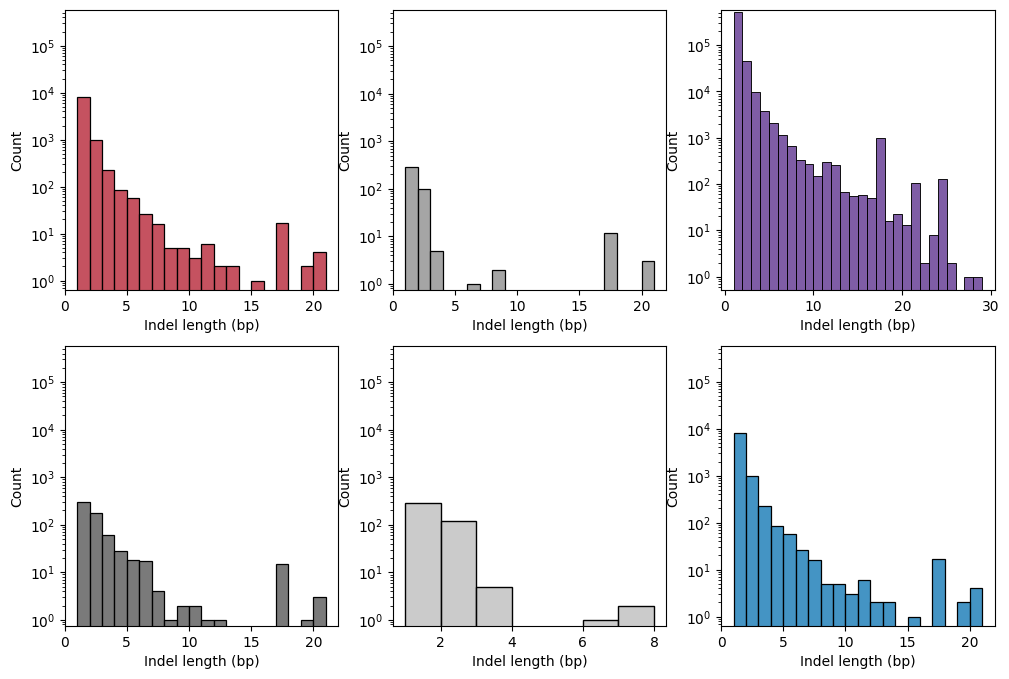

In [87]:
tag = 'Indel'
max_y = examplesam2.shape[0]
fig, axs = plt.subplots(nrows=2,ncols = 3,figsize=(12, 8))
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['mapper']==1],binwidth=1,
             x = 'indellength',ax = axs[0,0],color = '#b2182b')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['minimap']==1],binwidth=1,
             x = 'indellength',ax = axs[0,1],color = '#878787')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['bwa']==1],binwidth=1,
             x = 'indellength',ax = axs[1,1],color = '#bababa')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['bowtie']==1],binwidth=1,
             x = 'indellength',ax = axs[1,0],color = '#4d4d4d')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0],binwidth=1,
             x = 'indellength',ax = axs[1,2],color = '#0571b0')
sns.histplot(data = examplesam2,binwidth=1,
             x = 'indellength',ax = axs[0,2],color = '#542788')
axs[0,0].set(yscale="log")
axs[0,0].set_ylim([0,max_y])
axs[0,1].set(yscale="log")
axs[0,1].set_ylim([0,max_y])
axs[0,2].set(yscale="log")
axs[0,2].set_ylim([0,max_y])
axs[1,0].set(yscale="log")
axs[1,0].set_ylim([0,max_y])
axs[1,1].set(yscale="log")
axs[1,1].set_ylim([0,max_y])
axs[1,2].set(yscale="log")
axs[1,2].set_ylim([0,max_y])
axs[0,0].set_xlabel('%s length (bp)'%(tag)) 
axs[0,1].set_xlabel('%s length (bp)'%(tag)) 
axs[0,2].set_xlabel('%s length (bp)'%(tag)) 

axs[1,0].set_xlabel('%s length (bp)'%(tag)) 
axs[1,1].set_xlabel('%s length (bp)'%(tag)) 
axs[1,2].set_xlabel('%s length (bp)'%(tag)) 

plt.savefig('wrongalignment_%s1.pdf'%(tag))

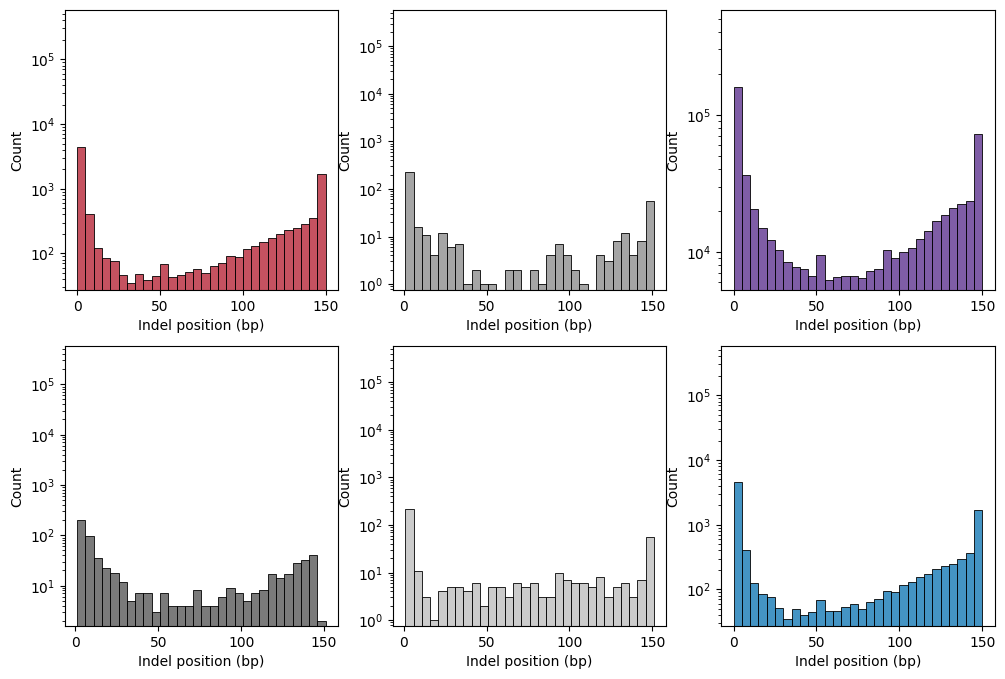

In [88]:
fig, axs = plt.subplots(nrows=2,ncols = 3,figsize=(12, 8))
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['mapper']==1],binwidth=5,
             x = 'beforeindel',ax = axs[0,0],color = '#b2182b')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['minimap']==1],binwidth=5,
             x = 'beforeindel',ax = axs[0,1],color = '#878787')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['bwa']==1],binwidth=5,
             x = 'beforeindel',ax = axs[1,1],color = '#bababa')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0][penaltyindel['bowtie']==1],binwidth=5,
             x = 'beforeindel',ax = axs[1,0],color = '#4d4d4d')
sns.histplot(data = penaltyindel[penaltyindel['indellength']>0],binwidth=5,
             x = 'beforeindel',ax = axs[1,2],color = '#0571b0')
sns.histplot(data = examplesam2,binwidth=5,
             x = 'beforeindel',ax = axs[0,2],color = '#542788')
axs[0,0].set(yscale="log")
axs[0,0].set_ylim([0,max_y])
axs[0,1].set(yscale="log")
axs[0,1].set_ylim([0,max_y])
axs[0,2].set(yscale="log")
axs[0,2].set_ylim([0,max_y])
axs[1,0].set(yscale="log")
axs[1,0].set_ylim([0,max_y])
axs[1,1].set(yscale="log")
axs[1,1].set_ylim([0,max_y])
axs[1,2].set(yscale="log")
axs[1,2].set_ylim([0,max_y])
axs[0,0].set_xlabel('%s position (bp)'%(tag)) 
axs[0,1].set_xlabel('%s position (bp)'%(tag)) 
axs[0,2].set_xlabel('%s position (bp)'%(tag)) 

axs[1,0].set_xlabel('%s position (bp)'%(tag)) 
axs[1,1].set_xlabel('%s position (bp)'%(tag)) 
axs[1,2].set_xlabel('%s position (bp)'%(tag)) 

plt.savefig('wrongalignment_%s2.pdf'%(tag))

In [153]:
# load all indels in mapper sam
bwasam = pd.read_csv('SNP_model_penalty/bwa/am_PaDi_g0001_all.fastq_am_PaDi_g0001.fasta.bwa.sam',
                        sep='\t',comment='@',header=None, on_bad_lines='skip')
bwasam2 = bwasam[bwasam[5].str.contains('D')]
bwasam2 = bwasam2.append(bwasam[bwasam[5].str.contains('I')])
bwasam2['indellength'] = -1
bwasam2['beforeindel'] = -1
bwasam2.index = range(0,bwasam2.shape[0])
# check indel distance
def indel_lengthcheck(CIGAR):
    CIGARlenset = re.split('S|D|M|I|N|H|P', CIGAR)[:-1]
    beforeindel = 0
    indellength = 0
    i = 0
    for CIGARlen in CIGARlenset:
        i += len(CIGARlen)
        CIGARtype = CIGAR[i]
        i += 1
        if CIGARtype not in ['I','D']:
            # not indel
            if indellength == 0:
                beforeindel += int(CIGARlen)
        else:
            indellength = int(CIGARlen)
    return [indellength,beforeindel]


for i in bwasam2.index:
    CIGAR = bwasam2.loc[i,5]
    indellength,beforeindel = indel_lengthcheck(CIGAR)
    bwasam2.loc[i,'indellength'] = indellength
    bwasam2.loc[i,'beforeindel'] = beforeindel

bwasam2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,indellength,beforeindel
0,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:10803...,0,scaffold5|size333600,113506,60,91M1D59M,*,0,0,GACTAATAGACAATAAGGATATAGACGTAGTGATCGTAGGTACACC...,AAAAAEEEEEEEEAEEEEEEEEEEEEEEAEEE/EEEEEEEEEEEEE...,NM:i:1,MD:Z:91^A59,AS:i:293,XS:i:0,1,91
1,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:11904...,16,scaffold38|size2697,1907,60,62M1D88M,*,0,0,ATTAAATTCCGTGTAGTTATAAATCCTATTCTAGAATGTGAGAACT...,<AEAEEAEEEEEEEEEEEEEEEEE<EEEEEEE/EEAE<AAEE/EEE...,NM:i:2,MD:Z:32T29^C88,AS:i:288,XS:i:0,1,62
2,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:16116...,0,scaffold16|size237848,215238,60,116M1D33M,*,0,0,GAAGAATTTATCAACTGGAAGGGATTGGAAACCTGACTATACAGAT...,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAEEEEE/EEEE...,NM:i:1,MD:Z:116^T33,AS:i:291,XS:i:0,1,116
3,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:18759...,16,scaffold17|size119877,78894,60,99M1D51M,*,0,0,TGTTGGAAATGAAAGAAATGTCCCGAATAGTCCCATACATATCCAT...,EEEEAAEEEEAEEAEEEEEEEEEAEEEEEEEEEAEEEEEEEEEEEE...,NM:i:1,MD:Z:99^A51,AS:i:293,XS:i:0,1,99
4,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11101:19880...,0,scaffold1|size462347,235053,60,43M1D13M,*,0,0,TTACTTATCGTTCCGCATATAATATATTAGTAAGCGGAACCGGTTG...,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE<...,NM:i:2,MD:Z:43^T3A9,AS:i:100,XS:i:0,1,43


<Axes: xlabel='beforeindel', ylabel='Count'>

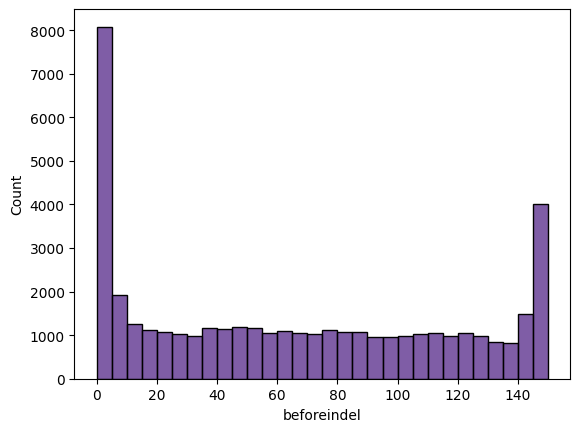

In [154]:
sns.histplot(data = bwasam2,binwidth=5,
             x = 'beforeindel',color = '#542788')


<Axes: xlabel='beforeindel', ylabel='Count'>

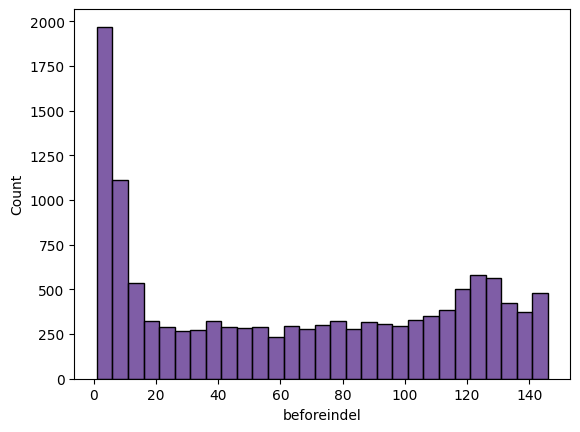

In [155]:
sns.histplot(data = bowtiesam2,binwidth=5,
             x = 'beforeindel',color = '#542788')


<Axes: xlabel='beforeindel', ylabel='Count'>

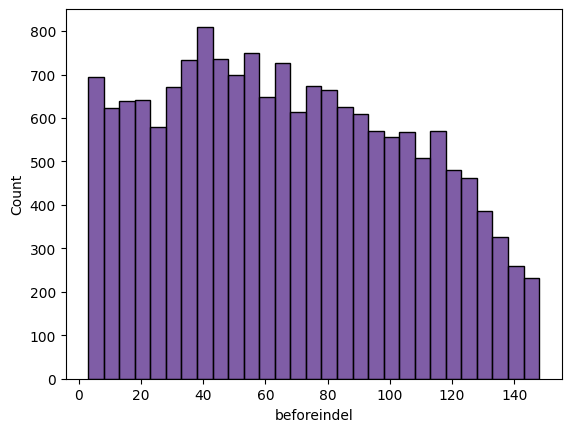

In [156]:
sns.histplot(data = minimapsam2,binwidth=5,
             x = 'beforeindel',color = '#542788')


In [ ]:
###

In [93]:
# double check new mapper
penaltysub = penalty[penalty['readID']==list(score2sub['readID'])[7]]
penaltysub

,readID,read,score,CIGAR,ref,CHR,POS,tool
6656,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,1000.0,*,NaN,NaN,NaN,0
6657,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,50.0,38S110M1I1M,AACGTTTGTACGCCTCCAGTTGCCTTTCAAAACAGAAAGTTGTCTG...,scaffold37|size3592,22.0,1
6658,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,50.0,38S110M1I1M,AACGTTTGTACGCCTCCAGTTGCCTTTCAAAACAGAAAGTTGTCTG...,scaffold37|size3592,22.0,2
6659,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,88.0,26S1D5M2D3M3D3M3D111M1I1M,NNNTTAAAGATAAACGTTTGTACGCCTCCAGTTGCCTTTCAAAACA...,scaffold37|size3592,1.0,3
6660,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,121.0,118S32M,GNNNTTAGAAAGCCGATAAAAAACGTTTGTAC,scaffold37|size3592,1.0,4
6661,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,121.0,118S32M,GNNNTTAGAAAGCCGATAAAAAACGTTTGTAC,scaffold37|size3592,1.0,5
6662,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,121.0,118S32M,GNNNTTAGAAAGCCGATAAAAAACGTTTGTAC,scaffold37|size3592,1.0,6
6663,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11111:5549:...,GTACAAACGTTTTTTATCGGCTTTCTAATTTCAAGATGAACGTTTG...,88.0,26S1D5M2D3M3D3M3D111M1I1M,NNNTTAAAGATAAACGTTTGTACGCCTCCAGTTGCCTTTCAAAACA...,scaffold37|size3592,1.0,7


In [92]:
# double check new mapper
penaltysub = penalty[penalty['readID']==list(score2sub['readID'])[4]]
penaltysub

,readID,read,score,CIGAR,ref,CHR,POS,tool
4256,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,1000.0,*,NaN,NaN,NaN,0
4257,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,86.0,122M28S,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,1
4258,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,86.0,122M28S,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,2
4259,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,89.0,121M3I3M1I4M1D1M1D16M1D1M,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,3
4260,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,89.0,122M3D1M1D2M6I18M1D1M,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,4
4261,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,89.0,122M3D1M1D2M6I18M1D1M,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,5
4262,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,89.0,122M3D1M1D2M6I18M1D1M,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,6
4263,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11107:8786:...,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,89.0,122M3D1M1D2M6I18M1D1M,CATAACCGCCGTTTTTCATTCTGTACCCCTGCCGTTCAAAGTCCGC...,scaffold36|size4225,959.0,7


In [42]:
if True:
    read = list(score2sub['readID'])[0]
    penaltysub = penalty[penalty['readID']==read]
    penaltysub = penaltysub[penaltysub['tool'].isin([0,1,2,3])]
    if len(penaltysub['CHR'].unique()) == 1:
        penaltytype = 'sameCHR'
        if len(penaltysub['POS'].unique()) == 1:
            penaltytype += 'samePOS'
        else:
            penaltytype += 'diffPOS'
    elif penaltysub[penaltysub['CHR'].isna()].shape[0] > 0:
        penaltytype = 'alignmentmissed'
    else:
        penaltytype = 'diffCHR'
    if any('S' in x for x in penaltysub['CIGAR']):
        penaltytype += 'In'
    if any('D' in x for x in penaltysub['CIGAR']):
        penaltytype += 'De'    
penaltytype

'sameCHRsamePOS'

In [12]:
list(score2sub['readID'])[0]

'SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:11109:12923:3466GCCTGTCGCTAGCGTTCATCCTGAGCCAGGATCAAACTCTTCGTTGTTTAAATTGTTTTATTACCCTCGCTCCGGAATCCGTTATTGTAGTCCAAAGTCATACTTC'

In [170]:
if True:
    read = list(score2sub['readID'])[0]
    penaltysub = penalty[penalty['readID']==read]
    penaltysub = penaltysub[penaltysub['tool'].isin([0,1,2,3])]
    if len(penaltysub['CHR'].unique()) == 1:
        penaltytype = 'sameCHR'
        if len(penaltysub['POS'].unique()) == 1:
            penaltytype += 'samePOS'
        else:
            penaltytype += 'diffPOS'
    elif penaltysub[penaltysub['CHR'].isna()].shape[0] > 0:
        penaltytype = 'alignmentmissed'
    else:
        penaltytype = 'diffCHR'
    if any('S' in x for x in penaltysub['CIGAR']):
        penaltytype += 'In'
    if any('D' in x for x in penaltysub['CIGAR']):
        penaltytype += 'De'    
penaltytype

'alignmentmissed'

In [163]:
penaltysub

,readID,read,score,CIGAR,ref,CHR,POS,tool
49720,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,GTTCTATAGAATCCTCAGCCTGATGTGAGATCAATCGCCCATTTGT...,12.0,53M,GAAGTTGACAAATGGGCGTTTGATCTCACATCAGGCTGAGGATTCT...,scaffold24|size71231,20591.0,0
49721,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,GTTCTATAGAATCCTCAGCCTGATGTGAGATCAATCGCCCATTTGT...,12.0,53M,GAAGTTGACAAATGGGCGTTTGATCTCACATCAGGCTGAGGATTCT...,scaffold24|size71231,20591.0,1
49722,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,GTTCTATAGAATCCTCAGCCTGATGTGAGATCAATCGCCCATTTGT...,1000.0,*,NaN,NaN,NaN,2
49723,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,GTTCTATAGAATCCTCAGCCTGATGTGAGATCAATCGCCCATTTGT...,12.0,53M,GAAGTTGACAAATGGGCGTTTGATCTCACATCAGGCTGAGGATTCT...,scaffold24|size71231,20591.0,3
50592,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,ATAATAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAATT...,16.0,3M2I45M,ATAAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAAATATTA,scaffold24|size71231,20346.0,0
50593,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,ATAATAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAATT...,18.0,50M,ATATAAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAAAT...,scaffold24|size71231,20344.0,1
50594,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,ATAATAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAATT...,18.0,50M,ATATAAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAAAT...,scaffold24|size71231,20344.0,2
50595,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251...,ATAATAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAATT...,16.0,3M2I45M,ATAAAAGGGTAATAAAATTCGAAGATGATGAAGTGGAAGAAAATATTA,scaffold24|size71231,20346.0,3


In [166]:
read

'SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:13104:24251:8144'

In [149]:
#bowtie\tbwa\tminimap\tmapper\tmapper (no ancestor)\tmapper (15mer)\tmapper (20mer)\tmapper (25mer)
penaltysub = penalty[penalty['readID']==list(score2sub['readID'])[8]]
penaltysub

,readID,read,score,CIGAR,ref,CHR,POS,tool
137312,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,82.0,4M17I129M,GGATATATCCCTTGAAAACTTGAAAGACCGTCTTGGCATACCTGCG...,scaffold36|size4225,1.0,0
137313,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,1
137314,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,2
137315,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,3
137316,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,4
137317,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,5
137318,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,6
137319,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,GGGCAGGTGTACCCTTTGGATATATCCCTTGAAAACTTGAAAGACC...,1000.0,*,NaN,NaN,NaN,7
168024,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,CCCGGTCACCTTGCTACGTTTGTTGTTTGGGTTTTCACGCACTTTC...,0.0,150M,AAGGACAAGAACGGAAAAGACAGAATAGATCATTTTGAGGAAAGAG...,scaffold36|size4225,56.0,0
168025,SL-NXA:HMCF2BGX3171213:HMCF2BGX3:1:22305:7721:...,CCCGGTCACCTTGCTACGTTTGTTGTTTGGGTTTTCACGCACTTTC...,1000.0,*,NaN,NaN,NaN,1


In [75]:
allparallel = pd.read_csv('/home/caozhichongchong/WS/WS2/scripts/snp_curate/SNP_model_penalty/parallel/alltimesum.txt',
                         sep='\t')
allparallel.head()


,threads,mapper,minimap2,bwa,bowtie2
0,30,8.70,1.90,6.86,4.57
1,25,18.12,3.10,15.36,11.17
2,20,29.00,4.34,21.74,17.73
3,15,39.14,5.69,29.63,24.89
4,10,51.14,7.23,36.77,33.24


Text(0, 0.5, 'Run time (s)')

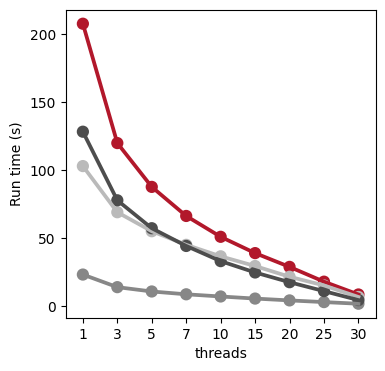

In [76]:
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(4, 4))
sns.pointplot(data = allparallel,x = 'threads',y = 'mapper',ax = axs,color = '#b2182b')
sns.pointplot(data = allparallel,x = 'threads',y = 'minimap2',ax = axs,color = '#878787')
sns.pointplot(data = allparallel,x = 'threads',y = 'bwa',ax = axs,color = '#bababa')
sns.pointplot(data = allparallel,x = 'threads',y = 'bowtie2',ax = axs,color = '#4d4d4d')
axs.set_ylabel('Run time (s)') 


Text(0, 0.5, 'Run time (s)')

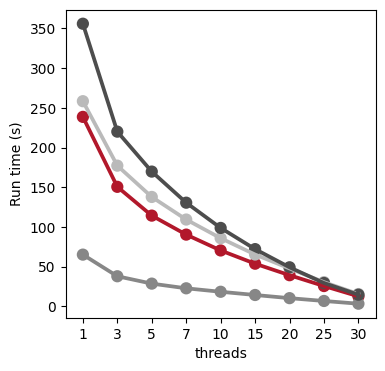

In [74]:
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(4, 4))
sns.pointplot(data = allparallel,x = 'threads',y = 'mapper',ax = axs,color = '#b2182b')
sns.pointplot(data = allparallel,x = 'threads',y = 'minimap2',ax = axs,color = '#878787')
sns.pointplot(data = allparallel,x = 'threads',y = 'bwa',ax = axs,color = '#bababa')
sns.pointplot(data = allparallel,x = 'threads',y = 'bowtie2',ax = axs,color = '#4d4d4d')
axs.set_ylabel('Run time (s)') 


In [73]:
250/13

19.23076923076923